# Feature Engineering Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations

# For better visualization in the notebook
%matplotlib inline

### Loading the Original Raw Dataset

In [2]:
# Load the dataset
df = pd.read_excel('../Track1_Data/raw/mental_health_dataset.xlsx')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Get basic information about the dataset
print("\nDataset Info:")
display(df.info())

First few rows of the dataset:


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              209 non-null    float64
 1   sex                              210 non-null    object 
 2   hospital_center_id               210 non-null    int64  
 3   condition                        210 non-null    object 
 4   condition_type                   209 non-null    object 
 5   bdi_ii_baseline                  209 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    210 non-null    int64  
 9   mindfulness_therapies_completed  210 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.5+ KB


None

### Splitting into Train and Test based on the 12 and 24 week outcome

The dividing of the dataset into the train and test will be based on the values of the `bdi_ii_after_intervention_12w`, `bdi_ii_follow_up_24w` columns. If the both columns are NULL then the row is added to the test dataframe and all other rows are added to the train dataframe. This is the main logic we will be using to split the dataset.

In [4]:
from pathlib import Path

# Rows where both follow-up columns are NaN go to test, the rest to train
mask_test = df['bdi_ii_after_intervention_12w'].isna() & df['bdi_ii_follow_up_24w'].isna()

test_df = df[mask_test].copy().reset_index(drop=True)
train_df = df[~mask_test].copy().reset_index(drop=True)

print(f"Total rows: {len(df)} | Train: {len(train_df)} | Test: {len(test_df)}")

# Save splits (creates directory if necessary)
out_dir = Path('../Track1_Data/processed')
out_dir.mkdir(parents=True, exist_ok=True)
train_df.to_excel(out_dir / 'train_split.xlsx', index=False)
test_df.to_excel(out_dir / 'test_split.xlsx', index=False)

# Quick preview
print("\nTrain sample:")
display(train_df.head())
print("\nTest sample:")
display(test_df.head())

Total rows: 210 | Train: 167 | Test: 43

Train sample:


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7
4,53.0,female,1,Cancer,Breast,13.0,8.0,9.0,0,0



Test sample:


,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
1,67.0,female,1,Cancer,Breast,25.0,NaN,NaN,5,1
2,73.0,female,1,Cancer,Breast,24.0,NaN,NaN,23,14
3,79.0,female,1,Cancer,Breast,10.0,NaN,NaN,0,0
4,80.0,female,1,Cancer,Breast,24.0,NaN,NaN,0,0


### Analysis of the train and test dataframe

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              167 non-null    float64
 1   sex                              167 non-null    object 
 2   hospital_center_id               167 non-null    int64  
 3   condition                        167 non-null    object 
 4   condition_type                   167 non-null    object 
 5   bdi_ii_baseline                  167 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    167 non-null    int64  
 9   mindfulness_therapies_completed  167 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 13.2+ KB


The train datasets has all the data with no null values and perfect data, this type of pure dataset would be very beneficial to train the model

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              42 non-null     float64
 1   sex                              43 non-null     object 
 2   hospital_center_id               43 non-null     int64  
 3   condition                        43 non-null     object 
 4   condition_type                   42 non-null     object 
 5   bdi_ii_baseline                  42 non-null     float64
 6   bdi_ii_after_intervention_12w    0 non-null      float64
 7   bdi_ii_follow_up_24w             0 non-null      float64
 8   mindfulness_therapies_started    43 non-null     int64  
 9   mindfulness_therapies_completed  43 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 3.5+ KB


We are able to see that there are 3 columns which has one null value, those columns are `age` which has null value in the 28th index row, `bdi_ii_baseline` which has null value in the 37th index row and also `condition_type` which is the 25th index row.

In [7]:
test_df[test_df['age'].isna()]

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
28,NaN,female,3,Lower-limb amputation,No prosthesis,12.0,NaN,NaN,0,0


In [11]:
test_df[test_df['bdi_ii_baseline'].isna()]

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
37,45.0,male,3,Acute coronary syndrome,Revascularization,NaN,NaN,NaN,5,3


In [9]:
test_df[test_df['condition_type'].isna()]

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
25,86.0,male,2,Renal insufficiency,NaN,7.0,NaN,NaN,4,0


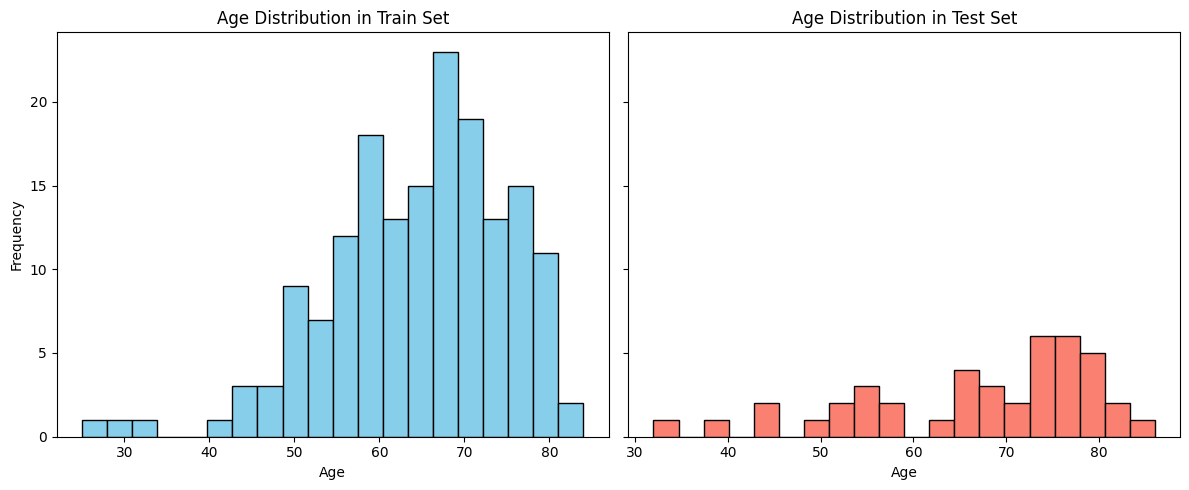

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plt.sca(axes[0])
plt.hist(train_df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution in Train Set')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.sca(axes[1])
plt.hist(test_df['age'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Age Distribution in Test Set')
plt.xlabel('Age')

plt.tight_layout()
plt.show()


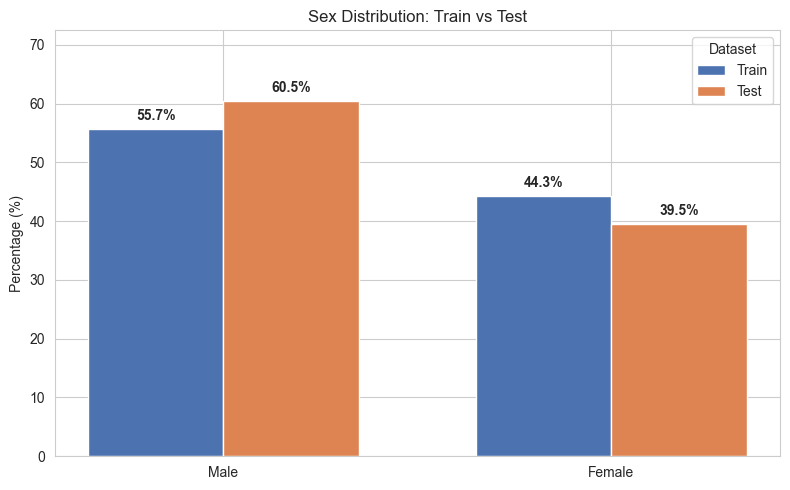

In [16]:
import numpy as np
import seaborn as sns

# Compare sex distribution between train and test in a single grouped bar plot

sns.set_style('whitegrid')

# categories in a consistent order
categories = ['male', 'female']

# counts and percentages
train_counts = train_df['sex'].value_counts().reindex(categories).fillna(0)
test_counts = test_df['sex'].value_counts().reindex(categories).fillna(0)

train_perc = (train_counts / train_counts.sum()) * 100
test_perc = (test_counts / test_counts.sum()) * 100

x = np.arange(len(categories))
width = 0.35

fig2, ax = plt.subplots(figsize=(8, 5))
colors = ['#4c72b0', '#dd8452']  # consistent, readable colors

bars_train = ax.bar(x - width/2, train_perc, width, label='Train', color=colors[0])
bars_test = ax.bar(x + width/2, test_perc, width, label='Test', color=colors[1])

# annotate percentages on top of the bars
for bar in bars_train + bars_test:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 1.0,  # slight offset above the bar
        f"{h:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='semibold'
    )

ax.set_xticks(x)
ax.set_xticklabels([c.capitalize() for c in categories])
ax.set_ylabel('Percentage (%)')
ax.set_title('Sex Distribution: Train vs Test')
ax.legend(title='Dataset')
ax.set_ylim(0, max(train_perc.max(), test_perc.max()) + 12)

plt.tight_layout()
plt.show()

### Each Hospital based BDI Analysis

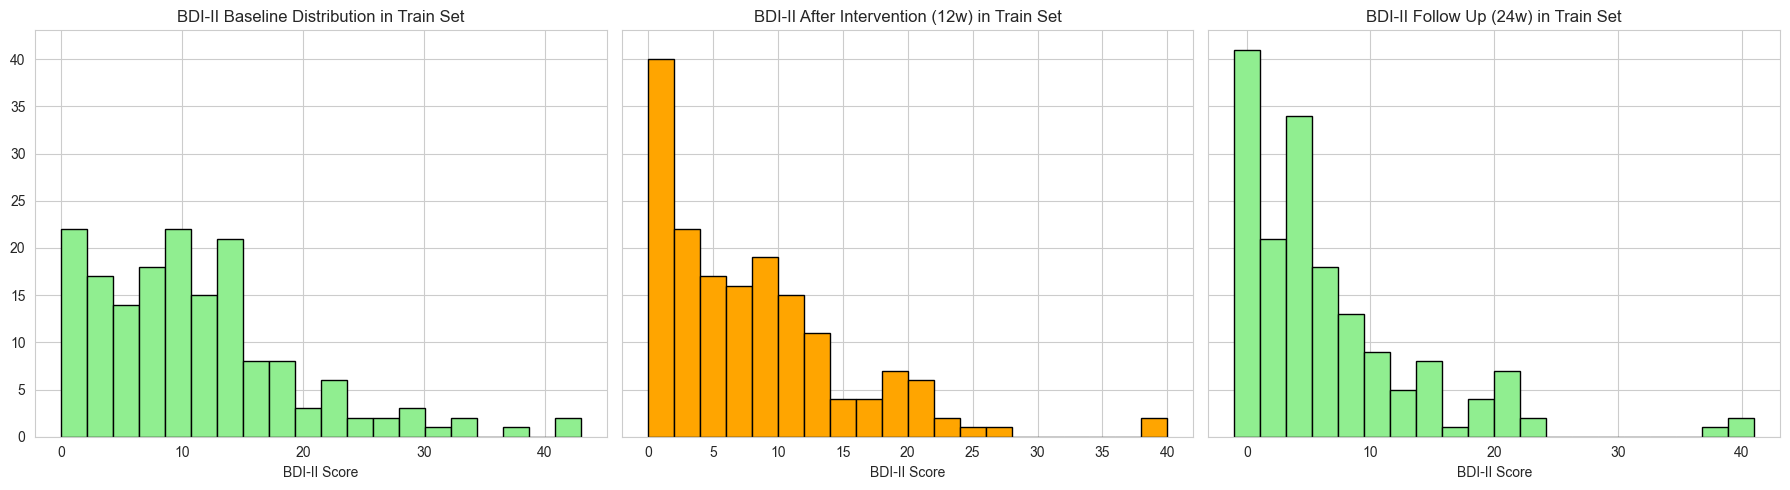

In [28]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plt.sca(axes[0])
plt.hist(train_df['bdi_ii_baseline'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('BDI-II Baseline Distribution in Train Set')
plt.xlabel('BDI-II Score')

plt.sca(axes[1])
plt.hist(train_df['bdi_ii_after_intervention_12w'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('BDI-II After Intervention (12w) in Train Set')
plt.xlabel('BDI-II Score')

plt.sca(axes[2])
plt.hist(train_df['bdi_ii_follow_up_24w'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('BDI-II Follow Up (24w) in Train Set')
plt.xlabel('BDI-II Score')

plt.tight_layout()
plt.show()


In [33]:
train_df['hospital_center_id'].value_counts()

hospital_center_id
1    121
3     39
2      7
Name: count, dtype: int64

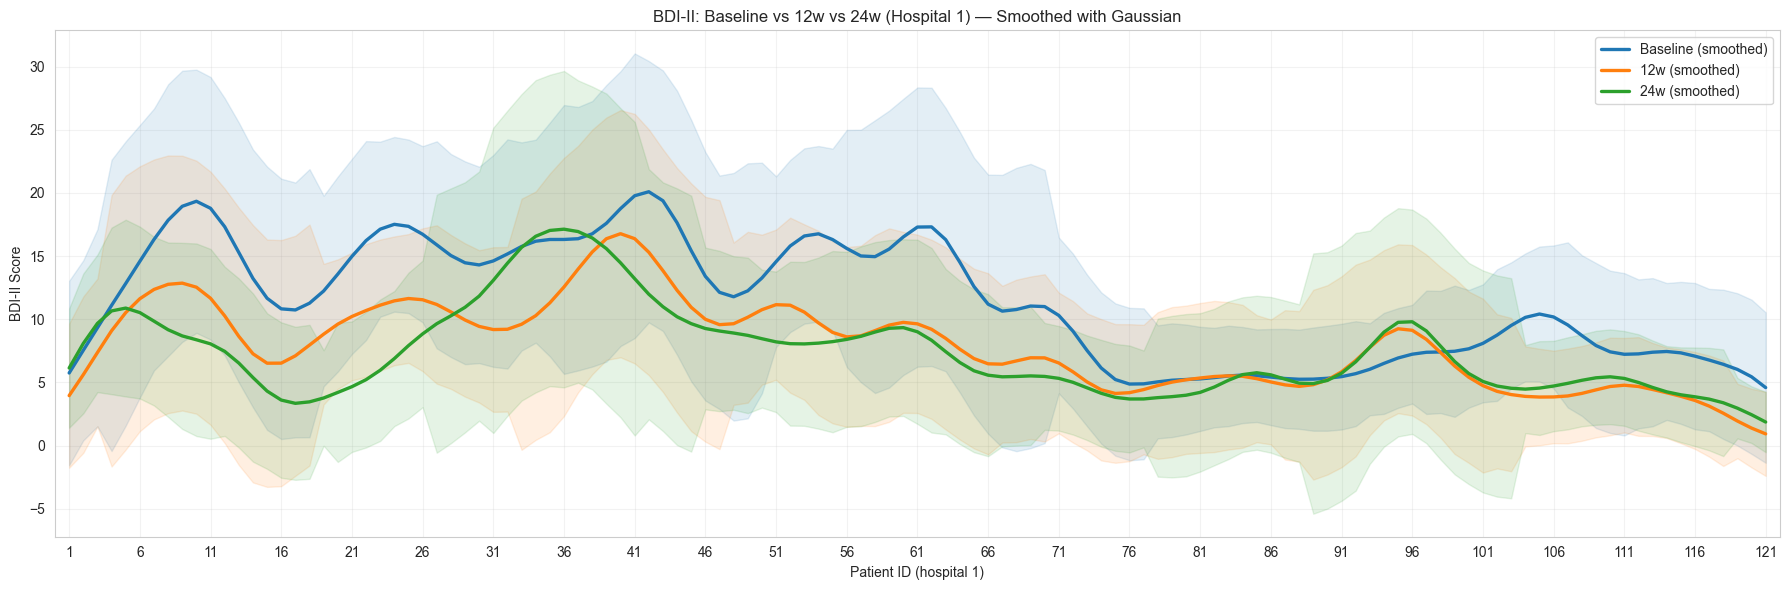

In [67]:
# Smooth lines with a Gaussian kernel and plot with a light +/- std band
def gaussian_kernel(sigma):
    radius = int(3 * sigma)
    xg = np.arange(-radius, radius + 1)
    k = np.exp(-0.5 * (xg / sigma) ** 2)
    return k / k.sum()

sigma = 2.5
kernel = gaussian_kernel(sigma)
window = len(kernel)

# helper to smooth and compute local std (accepts a 1D array-like)
def smooth_and_band(y, kernel, window):
    y = np.asarray(y, dtype=float)
    y_smooth = np.convolve(y, kernel, mode='same')
    # local std (rolling) for band
    y_std = pd.Series(y).rolling(window=window, center=True, min_periods=1).std().to_numpy()
    # fallback for NaNs at edges
    y_std = np.nan_to_num(y_std, nan=0.0)
    lower = y_smooth - y_std
    upper = y_smooth + y_std
    return y_smooth, lower, upper

# prepare hospital 1 dataframe and the series to smooth OUTSIDE the helper so variables
# like y_baseline exist in the notebook scope
hos_1_df = train_df[train_df['hospital_center_id'] == 1].copy().reset_index(drop=True)

# ensure a patient_id column exists
if 'patient_id' not in hos_1_df.columns:
    hos_1_df['patient_id'] = np.arange(1, len(hos_1_df) + 1)

# sort by patient_id for consistent ordering
if 'patient_id' in hos_1_df.columns:
    hos1_sorted = hos_1_df.sort_values('patient_id').reset_index(drop=True)
else:
    hos1_sorted = hos_1_df.reset_index(drop=True)

# define the series to be smoothed (ensure float dtype and fill NaN if needed)
y_baseline = hos1_sorted['bdi_ii_baseline'].astype(float).fillna(np.nan).to_numpy()
y_12w = hos1_sorted['bdi_ii_after_intervention_12w'].astype(float).fillna(np.nan).to_numpy()
y_24w = hos1_sorted['bdi_ii_follow_up_24w'].astype(float).fillna(np.nan).to_numpy()

# x for plotting (1-based patient index)
x = np.arange(1, len(y_baseline) + 1)

# compute smoothed series and bands
yb_s, lb, ub = smooth_and_band(y_baseline, kernel, window)
y12_s, l12, u12 = smooth_and_band(y_12w, kernel, window)
y24_s, l24, u24 = smooth_and_band(y_24w, kernel, window)

fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(x, yb_s, color=colors[0], label='Baseline (smoothed)', linewidth=2.4)
ax.fill_between(x, lb, ub, color=colors[0], alpha=0.12)

ax.plot(x, y12_s, color=colors[1], label='12w (smoothed)', linewidth=2.4)
ax.fill_between(x, l12, u12, color=colors[1], alpha=0.12)

# if colors has at least 3 entries use the third, otherwise reuse the second
col24 = colors[2] if len(colors) > 2 else colors[1]
ax.plot(x, y24_s, color=col24, label='24w (smoothed)', linewidth=2.4)
ax.fill_between(x, l24, u24, color=col24, alpha=0.12)

ax.set_xlim(0, int(x.max()) + 1)
ax.set_xlabel('Patient ID (hospital 1)')
ax.set_ylabel('BDI-II Score')
ax.set_title('BDI-II: Baseline vs 12w vs 24w (Hospital 1) — Smoothed with Gaussian')

# reduce xtick clutter: show every 5th (and last) patient id
step = 5
xticks = list(range(1, int(x.max()) + 1, step))
if int(x.max()) not in xticks:
    xticks.append(int(x.max()))
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=0)

ax.legend()
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

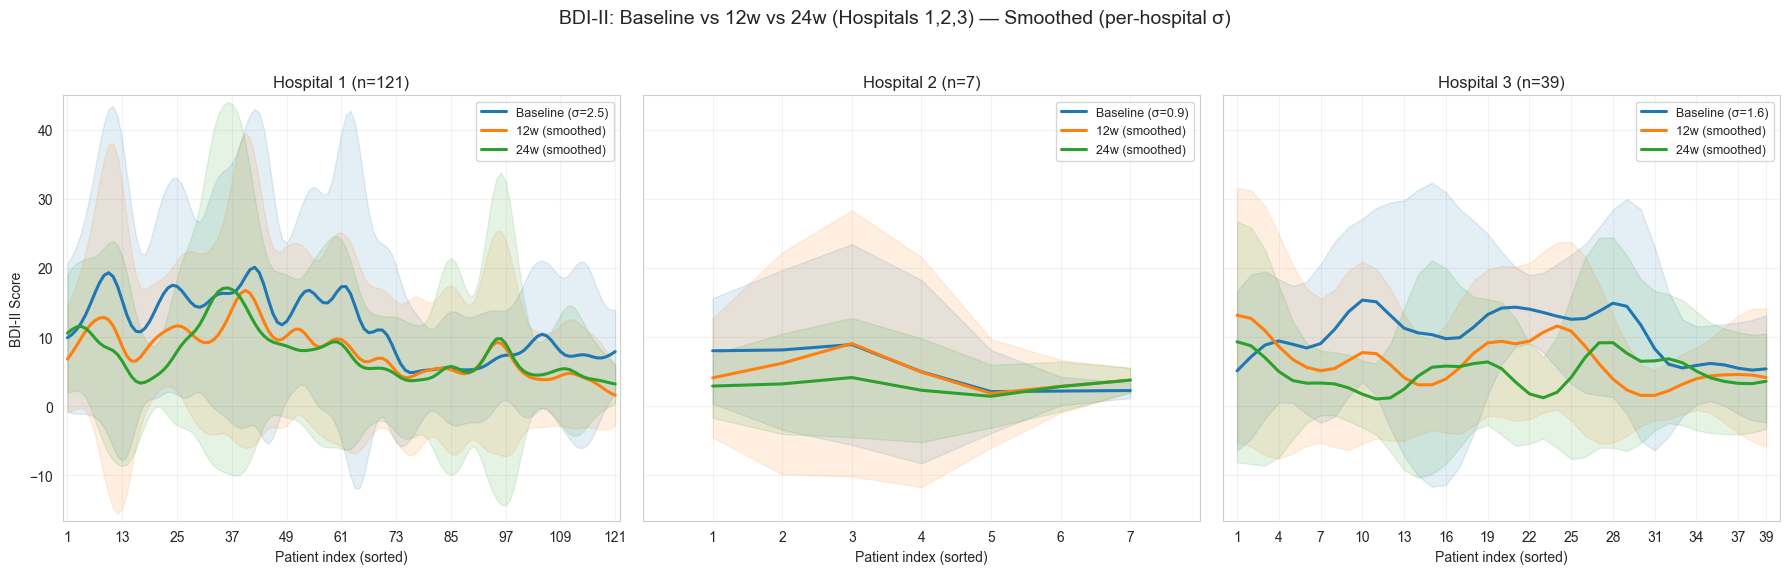

In [72]:
# prepare and plot smoothed curves for hospitals, robust to empty groups, NaN gaps and ordered by count
# re-uses kernel, colors, window from earlier cells

def _center_trim_or_pad(arr, target_len):
    arr = np.asarray(arr, dtype=float)
    m = len(arr)
    if m == target_len:
        return arr
    if m > target_len:
        start = (m - target_len) // 2
        return arr[start:start + target_len]
    out = np.full(target_len, np.nan, dtype=float)
    start = (target_len - m) // 2
    out[start:start + m] = arr
    return out

def gaussian_kernel(sigma, radius=None):
    sigma = float(sigma)
    if sigma <= 0:
        return np.array([1.0])
    if radius is None:
        radius = max(1, int(np.ceil(4.0 * sigma)))
    x = np.arange(-radius, radius + 1)
    k = np.exp(-0.5 * (x / sigma) ** 2)
    k = k.astype(float)
    k /= k.sum()
    return k

def safe_smooth_and_band(y, kernel, window):
    y = np.asarray(y, dtype=float).copy()
    n = len(y)
    if n == 0 or np.all(np.isnan(y)):
        return np.full(n, np.nan), np.full(n, np.nan), np.full(n, np.nan)
    try:
        s = pd.Series(y)
        # limit should not exceed length
        limit = int(max(1, min(window, n)))
        y_interp = s.interpolate(limit=limit, limit_direction='both').to_numpy()
    except Exception:
        y_interp = y.copy()

    mask = (~np.isnan(y_interp)).astype(float)
    y0 = np.nan_to_num(y_interp, 0.0)
    kernel = np.asarray(kernel, dtype=float)

    conv_y = np.convolve(y0, kernel, mode='same')
    conv_mask = np.convolve(mask, kernel, mode='same')

    conv_y = _center_trim_or_pad(conv_y, n)
    conv_mask = _center_trim_or_pad(conv_mask, n)

    with np.errstate(invalid='ignore', divide='ignore'):
        mean = conv_y / conv_mask
    mean[conv_mask == 0] = np.nan

    y2 = np.nan_to_num(y_interp ** 2, 0.0)
    conv_y2 = np.convolve(y2, kernel, mode='same')
    conv_y2 = _center_trim_or_pad(conv_y2, n)

    with np.errstate(invalid='ignore', divide='ignore'):
        var = conv_y2 / conv_mask - np.nan_to_num(mean) ** 2
    var = np.where(np.isnan(var) | (var < 0), 0.0, var)
    std = np.sqrt(var)

    lb = mean - 1.96 * std
    ub = mean + 1.96 * std
    lb[conv_mask == 0] = np.nan
    ub[conv_mask == 0] = np.nan

    return mean, lb, ub

# choose per-hospital sigma values (tune as needed)
sigma_map = {
    1: 2.5,   # original / stronger smoothing for big hospital
    2: 0.9,   # much smaller sigma so small hospitals don't become straight lines
    3: 1.6    # medium smoothing
}
# if a default sigma variable exists, keep it as fallback
default_sigma = float(globals().get('sigma', 2.5))

# ensure we plot in hospital order 1,2,3 (but only those present in train_df)
desired_order = [1, 2, 3]
available = set(train_df['hospital_center_id'].unique())
hospital_sequence = [h for h in desired_order if h in available]

results = {}
processed = []

for hid in hospital_sequence:
    df_h = train_df[train_df['hospital_center_id'] == hid].copy().reset_index(drop=True)
    if df_h.empty:
        print(f"Skipping hospital {hid}: no rows in train_df")
        continue

    if 'patient_id' not in df_h.columns:
        df_h['patient_id'] = np.arange(1, len(df_h) + 1)
    df_h = df_h.sort_values('patient_id').reset_index(drop=True)

    yb = df_h['bdi_ii_baseline'].astype(float).to_numpy()
    y12 = df_h['bdi_ii_after_intervention_12w'].astype(float).to_numpy()
    y24 = df_h['bdi_ii_follow_up_24w'].astype(float).to_numpy()

    if (len(yb) == 0 and len(y12) == 0 and len(y24) == 0) or (np.all(np.isnan(yb)) and np.all(np.isnan(y12)) and np.all(np.isnan(y24))):
        print(f"Skipping hospital {hid}: all target arrays empty or NaN")
        continue

    sigma_h = sigma_map.get(hid, default_sigma)
    kernel_h = gaussian_kernel(sigma_h)
    interp_window = int(max(1, min(window, len(df_h))))

    try:
        yb_s, lb, ub = safe_smooth_and_band(yb, kernel_h, interp_window)
        y12_s, l12, u12 = safe_smooth_and_band(y12, kernel_h, interp_window)
        y24_s, l24, u24 = safe_smooth_and_band(y24, kernel_h, interp_window)
    except Exception as e:
        print(f"Skipping hospital {hid} due to smoothing error: {e}")
        continue

    x = np.arange(1, len(df_h) + 1)

    def ensure_len(a, L):
        a = np.asarray(a, dtype=float)
        if len(a) != L:
            return _center_trim_or_pad(a, L)
        return a

    results[hid] = {
        'df': df_h,
        'x': x,
        'yb_s': ensure_len(yb_s, len(x)), 'lb': ensure_len(lb, len(x)), 'ub': ensure_len(ub, len(x)),
        'y12_s': ensure_len(y12_s, len(x)), 'l12': ensure_len(l12, len(x)), 'u12': ensure_len(u12, len(x)),
        'y24_s': ensure_len(y24_s, len(x)), 'l24': ensure_len(l24, len(x)), 'u24': ensure_len(u24, len(x)),
        'sigma': sigma_h
    }
    processed.append(hid)

if len(processed) == 0:
    print("No hospitals to plot after processing.")
else:
    ymins, ymaxs = [], []
    for r in results.values():
        for arr_name in ('lb','l12','l24'):
            a = r.get(arr_name)
            if a is not None and np.any(~np.isnan(a)):
                ymins.append(np.nanmin(a))
        for arr_name in ('ub','u12','u24'):
            a = r.get(arr_name)
            if a is not None and np.any(~np.isnan(a)):
                ymaxs.append(np.nanmax(a))
    ymin = np.nanmin(ymins) if ymins else 0.0
    ymax = np.nanmax(ymaxs) if ymaxs else 1.0

    n = len(processed)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6), sharey=True)
    if n == 1:
        axes = np.array([axes])

    for ax, hid in zip(axes, processed):
        r = results[hid]
        x = r['x']

        ax.plot(x, r['yb_s'], color=colors[0], label=f'Baseline (σ={r["sigma"]})', linewidth=2.2)
        ax.fill_between(x, r['lb'], r['ub'], color=colors[0], alpha=0.12)

        ax.plot(x, r['y12_s'], color=colors[1], label='12w (smoothed)', linewidth=2.2)
        ax.fill_between(x, r['l12'], r['u12'], color=colors[1], alpha=0.12)

        col24 = colors[2] if len(colors) > 2 else colors[1]
        ax.plot(x, r['y24_s'], color=col24, label='24w (smoothed)', linewidth=2.2)
        ax.fill_between(x, r['l24'], r['u24'], color=col24, alpha=0.12)

        ax.set_title(f'Hospital {hid} (n={len(r["df"])})')
        ax.set_xlabel('Patient index (sorted)')
        if ax is axes[0]:
            ax.set_ylabel('BDI-II Score')

        if len(x) > 1:
            step = max(1, int(len(x) / 10))
            xticks = list(range(1, int(x.max()) + 1, step))
            if int(x.max()) not in xticks:
                xticks.append(int(x.max()))
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticks, rotation=0)

        ax.set_xlim(0, int(x.max()) + 1)
        ax.set_ylim(ymin - 1.0, ymax + 1.0)
        ax.grid(alpha=0.25)
        ax.legend(fontsize=9)

    plt.suptitle('BDI-II: Baseline vs 12w vs 24w (Hospitals 1,2,3) — Smoothed (per-hospital σ)', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [73]:
train_df.columns

Index(['age', 'sex', 'hospital_center_id', 'condition', 'condition_type',
       'bdi_ii_baseline', 'bdi_ii_after_intervention_12w',
       'bdi_ii_follow_up_24w', 'mindfulness_therapies_started',
       'mindfulness_therapies_completed'],
      dtype='object')

### Condition and Condition Type Analysis

We can see that the distribution of the conditions such as Cancer, Acute Coronary Syndrome, Renal Insufficiency and Lower-limb Amputation has relevant splits majoring the data in the train split with 85%, 75%, 52% and 83% of the data is in the train split. 

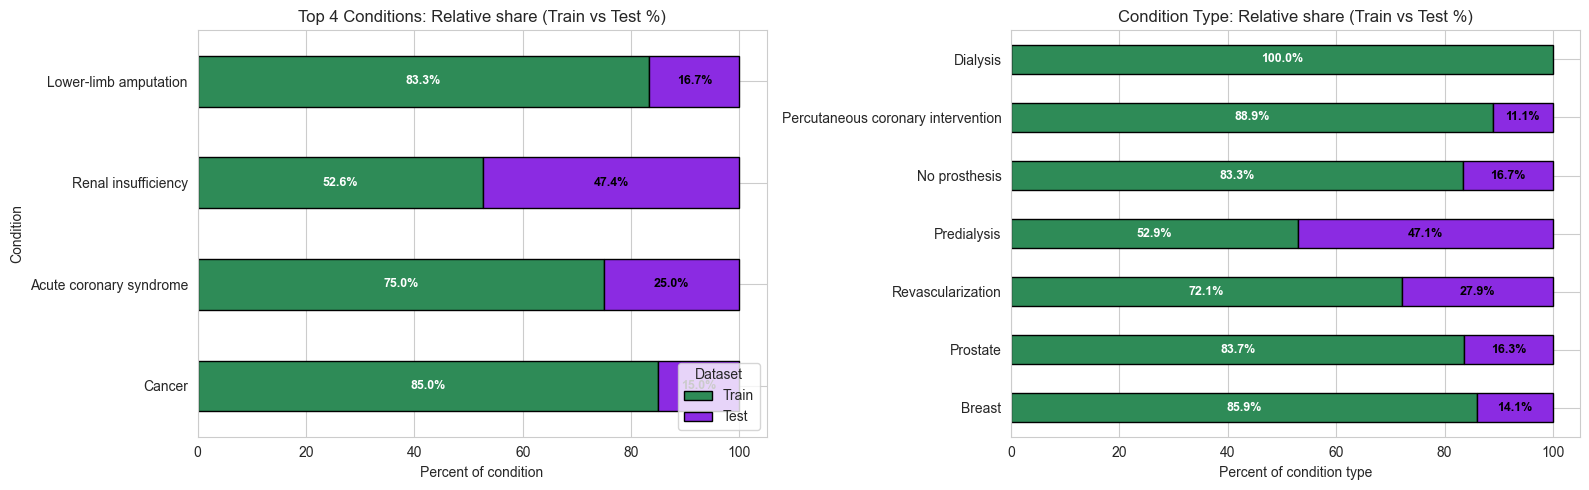

In [93]:
# Horizontal stacked bar of percent share (Train vs Test) for top conditions

N = 10
# New palette (green and purple) to replace previous blue/orange
palette = ['#2E8B57', '#8B2BE2']  # Train, Test

# Combine datasets and label them
combined = pd.concat([
    train_df.assign(_dataset='Train'),
    test_df.assign(_dataset='Test')
], ignore_index=True)

# Prepare data for conditions (left plot)
counts_cond = combined.groupby(['condition', '_dataset']).size().unstack(fill_value=0)

# Prepare data for condition_type (right plot) using the full df as "Total" vs train/test
# We'll show Train vs Test split for condition_type (consistent with left plot)
counts_ct = combined.groupby(['condition_type', '_dataset']).size().unstack(fill_value=0)

# Create side-by-side subplots
fig, (axL, axR) = plt.subplots(1, 2, figsize=(16, max(5, 0.5 * max(len(counts_cond), len(counts_ct)))))

# --- Left: Top conditions ---
if counts_cond.empty:
    axL.text(0.5, 0.5, 'No condition data found to plot.', ha='center', va='center')
    axL.set_axis_off()
else:
    top_conditions = counts_cond.sum(axis=1).sort_values(ascending=False).head(N).index
    subset = counts_cond.loc[top_conditions]
    subset_perc = subset.div(subset.sum(axis=1), axis=0) * 100
    subset_perc = subset_perc.reindex(columns=['Train', 'Test'], fill_value=0)

    subset_perc.plot(kind='barh', stacked=True, ax=axL, color=palette, edgecolor='k')
    axL.set_title(f'Top {len(subset_perc)} Conditions: Relative share (Train vs Test %)')
    axL.set_xlabel('Percent of condition')
    axL.set_ylabel('Condition')
    axL.legend(title='Dataset', loc='lower right')

    # Annotate percent inside bars when there's space
    for i, (idx, row) in enumerate(subset_perc.iterrows()):
        left = 0.0
        for j, col in enumerate(subset_perc.columns):
            val = float(row[col])
            if val > 2:  # annotate only when there is space
                axL.text(left + val / 2, i, f'{val:.1f}%', ha='center', va='center',
                         color='white' if j == 0 else 'black', fontsize=9, fontweight='semibold')
            left += val

# --- Right: Condition Type ---
if counts_ct.empty:
    axR.text(0.5, 0.5, 'No condition_type data found to plot.', ha='center', va='center')
    axR.set_axis_off()
else:
    # Use all condition_type entries sorted by total occurrences
    top_ct = counts_ct.sum(axis=1).sort_values(ascending=False).index
    subset_ct = counts_ct.loc[top_ct]
    subset_ct_perc = subset_ct.div(subset_ct.sum(axis=1), axis=0) * 100
    subset_ct_perc = subset_ct_perc.reindex(columns=['Train', 'Test'], fill_value=0)

    subset_ct_perc.plot(kind='barh', stacked=True, ax=axR, color=palette, edgecolor='k')
    axR.set_title('Condition Type: Relative share (Train vs Test %)')
    axR.set_xlabel('Percent of condition type')
    axR.set_ylabel('')
    axR.legend_.remove()  # remove duplicate legend (keep left one)

    # Annotate percent inside bars when there's space
    for i, (idx, row) in enumerate(subset_ct_perc.iterrows()):
        left = 0.0
        for j, col in enumerate(subset_ct_perc.columns):
            val = float(row[col])
            if val > 2:
                axR.text(left + val / 2, i, f'{val:.1f}%', ha='center', va='center',
                        color='white' if j == 0 else 'black', fontsize=9, fontweight='semibold')
            left += val

plt.tight_layout()
plt.show()

In [5]:
train_df = pd.read_excel('../Track1_Data/processed/train_split.xlsx')

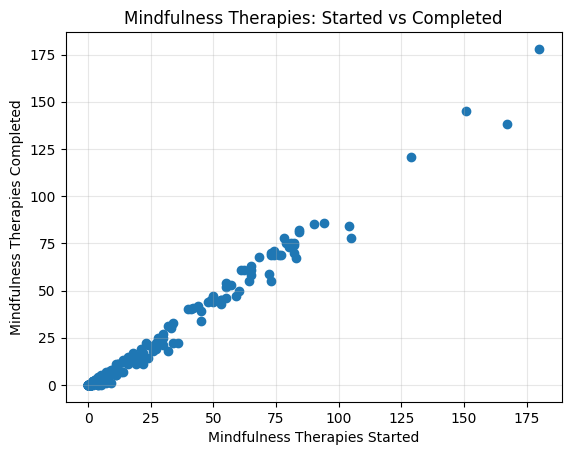

In [9]:
plt.scatter(df['mindfulness_therapies_started'], df['mindfulness_therapies_completed'])
plt.xlabel('Mindfulness Therapies Started')
plt.ylabel('Mindfulness Therapies Completed')
plt.title('Mindfulness Therapies: Started vs Completed')
plt.grid(alpha=0.3)
plt.show()

## Mindfulness Therapy Effectiveness Analysis

This section analyzes the relationship between mindfulness therapy completion and BDI-II score improvements to understand treatment effectiveness across different patient populations and time periods.

In [10]:
# Load the complete dataset and calculate effectiveness metrics
df_complete = pd.read_excel('../Track1_Data/raw/mental_health_dataset.xlsx')

# Calculate therapy completion rate and BDI improvements
df_complete['completion_rate'] = df_complete['mindfulness_therapies_completed'] / df_complete['mindfulness_therapies_started']
df_complete['improvement_12w'] = df_complete['bdi_ii_baseline'] - df_complete['bdi_ii_after_intervention_12w']
df_complete['improvement_24w'] = df_complete['bdi_ii_baseline'] - df_complete['bdi_ii_follow_up_24w']

# Calculate percentage improvements
df_complete['pct_improvement_12w'] = (df_complete['improvement_12w'] / df_complete['bdi_ii_baseline']) * 100
df_complete['pct_improvement_24w'] = (df_complete['improvement_24w'] / df_complete['bdi_ii_baseline']) * 100

# Create therapy effectiveness categories
df_complete['therapy_category'] = pd.cut(df_complete['completion_rate'], 
                                       bins=[0, 0.3, 0.7, 1.0], 
                                       labels=['Low (0-30%)', 'Medium (30-70%)', 'High (70-100%)'])

print("Dataset prepared with effectiveness metrics:")
print(f"Total patients: {len(df_complete)}")
print(f"Patients with 12w follow-up: {df_complete['improvement_12w'].notna().sum()}")
print(f"Patients with 24w follow-up: {df_complete['improvement_24w'].notna().sum()}")
print(f"Average completion rate: {df_complete['completion_rate'].mean():.2%}")

# Display sample of the enhanced dataset
display(df_complete[['bdi_ii_baseline', 'bdi_ii_after_intervention_12w', 'bdi_ii_follow_up_24w', 
                    'mindfulness_therapies_started', 'mindfulness_therapies_completed', 
                    'completion_rate', 'improvement_12w', 'improvement_24w']].head(10))

Dataset prepared with effectiveness metrics:
Total patients: 210
Patients with 12w follow-up: 167
Patients with 24w follow-up: 166
Average completion rate: 71.81%


,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed,completion_rate,improvement_12w,improvement_24w
0,10.0,3.0,7.0,14,13,0.928571,7.0,3.0
1,4.0,4.0,8.0,14,12,0.857143,0.0,-4.0
2,18.0,10.0,13.0,4,4,1.000000,8.0,5.0
3,11.0,NaN,NaN,0,0,NaN,NaN,NaN
4,5.0,11.0,20.0,12,7,0.583333,-6.0,-15.0
5,25.0,NaN,NaN,5,1,0.200000,NaN,NaN
6,24.0,NaN,NaN,23,14,0.608696,NaN,NaN
7,13.0,8.0,9.0,0,0,NaN,5.0,4.0
8,10.0,13.0,10.0,62,61,0.983871,-3.0,0.0
9,24.0,21.0,15.0,83,67,0.807229,3.0,9.0


### 1. Therapy Completion vs BDI Improvement Correlation Analysis

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18524\894386749.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data, labels=labels, patch_artist=True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_18524\894386749.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(plot_data, labels=labels, patch_artist=True)


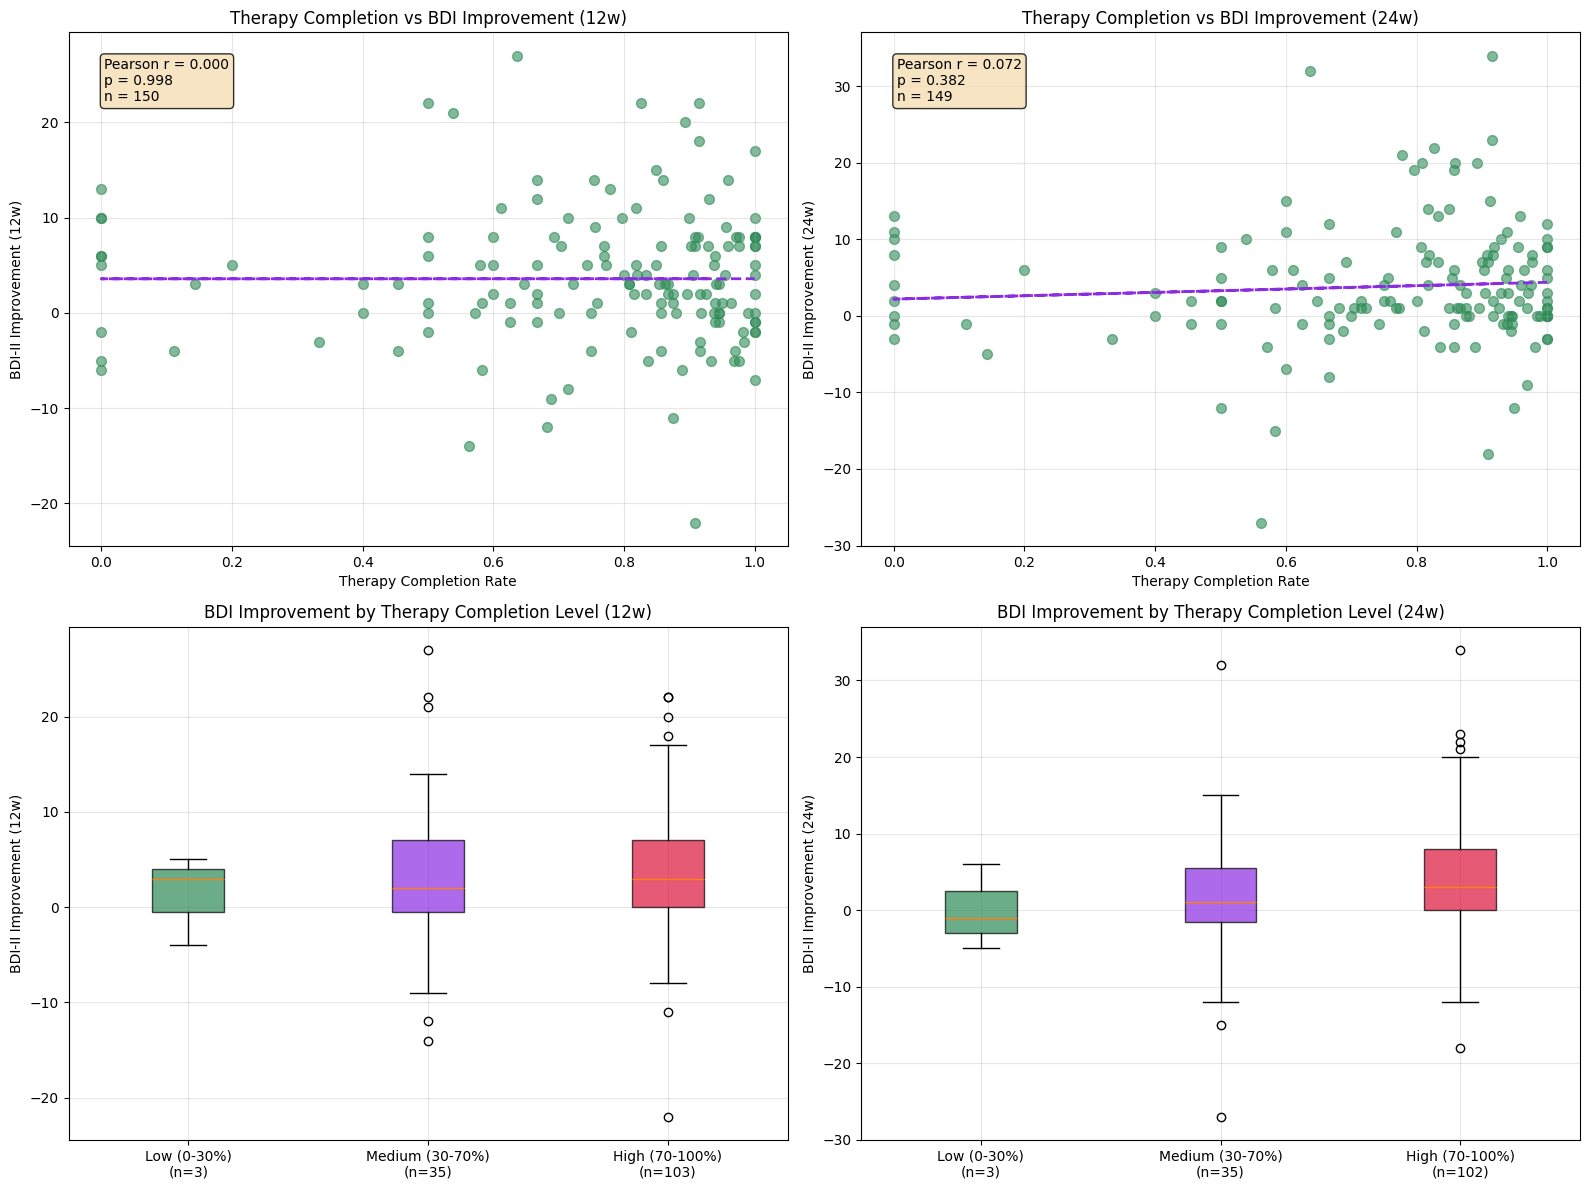


CORRELATION ANALYSIS RESULTS

12W Follow-up:
  Pearson correlation: r = 0.0002, p = 0.9978
  Spearman correlation: ρ = -0.0173, p = 0.8332
  Sample size: 150 patients
  → No significant correlation detected

24W Follow-up:
  Pearson correlation: r = 0.0722, p = 0.3817
  Spearman correlation: ρ = 0.0457, p = 0.5804
  Sample size: 149 patients
  → No significant correlation detected


In [11]:
# Comprehensive correlation analysis
from scipy.stats import pearsonr, spearmanr
import matplotlib.patches as mpatches

# Define new color palette (avoiding blue/orange)
therapy_colors = ['#2E8B57', '#8B2BE2', '#DC143C', '#FF8C00', '#4682B4']

# Calculate correlations
correlations = {}
for period in ['12w', '24w']:
    improvement_col = f'improvement_{period}'
    valid_data = df_complete[['completion_rate', improvement_col]].dropna()
    
    if len(valid_data) > 3:
        pearson_r, pearson_p = pearsonr(valid_data['completion_rate'], valid_data[improvement_col])
        spearman_r, spearman_p = spearmanr(valid_data['completion_rate'], valid_data[improvement_col])
        
        correlations[period] = {
            'pearson_r': pearson_r,
            'pearson_p': pearson_p,
            'spearman_r': spearman_r,
            'spearman_p': spearman_p,
            'n_samples': len(valid_data)
        }

# Create scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top row: Scatter plots with regression lines
for i, period in enumerate(['12w', '24w']):
    ax = axes[0, i]
    improvement_col = f'improvement_{period}'
    
    # Scatter plot
    valid_data = df_complete[['completion_rate', improvement_col]].dropna()
    scatter = ax.scatter(valid_data['completion_rate'], valid_data[improvement_col], 
                        alpha=0.6, c=therapy_colors[0], s=50)
    
    # Regression line
    if len(valid_data) > 1:
        z = np.polyfit(valid_data['completion_rate'], valid_data[improvement_col], 1)
        p = np.poly1d(z)
        ax.plot(valid_data['completion_rate'], p(valid_data['completion_rate']), 
                color=therapy_colors[1], linewidth=2, linestyle='--')
    
    ax.set_xlabel('Therapy Completion Rate')
    ax.set_ylabel(f'BDI-II Improvement ({period})')
    ax.set_title(f'Therapy Completion vs BDI Improvement ({period})')
    ax.grid(True, alpha=0.3)
    
    # Add correlation info
    if period in correlations:
        corr_info = correlations[period]
        ax.text(0.05, 0.95, f"Pearson r = {corr_info['pearson_r']:.3f}\np = {corr_info['pearson_p']:.3f}\nn = {corr_info['n_samples']}", 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Bottom row: Box plots by therapy completion categories
for i, period in enumerate(['12w', '24w']):
    ax = axes[1, i]
    improvement_col = f'improvement_{period}'
    
    # Prepare data for box plot
    plot_data = []
    labels = []
    for category in ['Low (0-30%)', 'Medium (30-70%)', 'High (70-100%)']:
        category_data = df_complete[df_complete['therapy_category'] == category][improvement_col].dropna()
        if len(category_data) > 0:
            plot_data.append(category_data)
            labels.append(f"{category}\n(n={len(category_data)})")
    
    if plot_data:
        bp = ax.boxplot(plot_data, labels=labels, patch_artist=True)
        for patch, color in zip(bp['boxes'], therapy_colors[:len(plot_data)]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
    
    ax.set_ylabel(f'BDI-II Improvement ({period})')
    ax.set_title(f'BDI Improvement by Therapy Completion Level ({period})')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed correlation results
print("\n" + "="*60)
print("CORRELATION ANALYSIS RESULTS")
print("="*60)
for period, stats in correlations.items():
    print(f"\n{period.upper()} Follow-up:")
    print(f"  Pearson correlation: r = {stats['pearson_r']:.4f}, p = {stats['pearson_p']:.4f}")
    print(f"  Spearman correlation: ρ = {stats['spearman_r']:.4f}, p = {stats['spearman_p']:.4f}")
    print(f"  Sample size: {stats['n_samples']} patients")
    
    # Interpretation
    if stats['pearson_p'] < 0.05:
        strength = "weak" if abs(stats['pearson_r']) < 0.3 else "moderate" if abs(stats['pearson_r']) < 0.7 else "strong"
        direction = "positive" if stats['pearson_r'] > 0 else "negative"
        print(f"  → Significant {strength} {direction} correlation")
    else:
        print(f"  → No significant correlation detected")

### 2. Baseline BDI Severity Impact on Treatment Response

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18524\3363407895.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax4.boxplot(improvement_by_severity_12w, labels=severity_labels, patch_artist=True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_18524\3363407895.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_complete.groupby(['baseline_severity', 'completion_bins'])['improvement_12w'].mean().unstack()


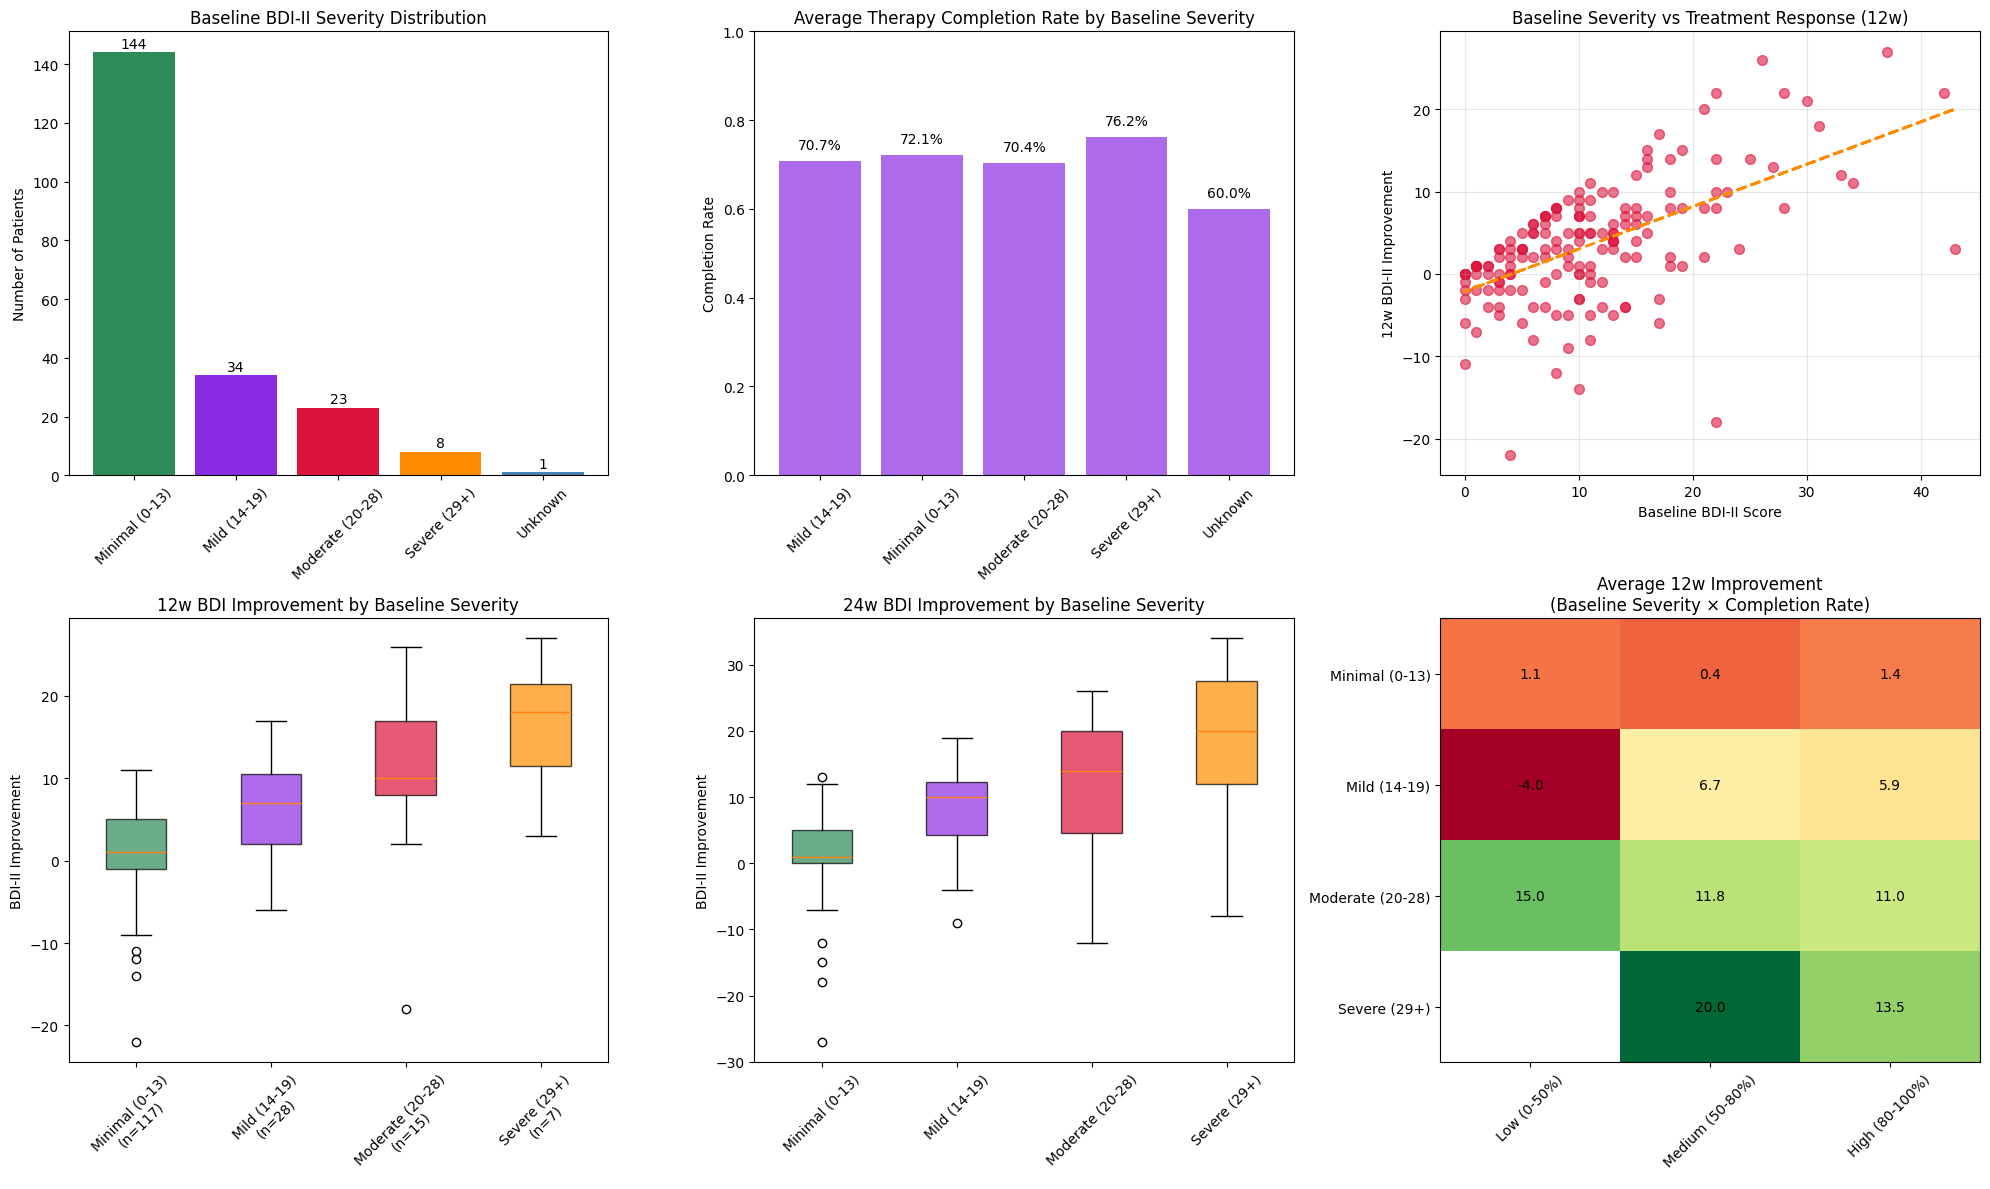


BASELINE SEVERITY IMPACT ANALYSIS

Summary Statistics by Baseline Severity:


completion_rate               improvement_12w          \
                            count   mean    std           count    mean   
baseline_severity                                                         
Mild (14-19)                   26  0.707  0.334              28   6.250   
Minimal (0-13)                118  0.721  0.296             117   1.239   
Moderate (20-28)               18  0.704  0.194              15  10.800   
Severe (29+)                    8  0.762  0.135               7  16.286   
Unknown                         1  0.600    NaN               0     NaN   

                          improvement_24w                 bdi_ii_baseline  
                      std           count    mean     std            mean  
baseline_severity                                                          
Mild (14-19)        6.258              28   8.071   6.738          16.353  
Minimal (0-13)      5.369             117   1.632   5.453           6.639  
Moderate (20-28)   10.638              14  11.857  10.755          23.348  
Severe (29+)        8.118               7  17.857  14.358          35.625  
Unknown               NaN               0     NaN     NaN             NaN

In [12]:
# Analyze how baseline BDI severity affects treatment response
# BDI-II severity categories: 0-13 minimal, 14-19 mild, 20-28 moderate, 29-63 severe

def categorize_bdi_severity(score):
    if pd.isna(score):
        return 'Unknown'
    elif score <= 13:
        return 'Minimal (0-13)'
    elif score <= 19:
        return 'Mild (14-19)'
    elif score <= 28:
        return 'Moderate (20-28)'
    else:
        return 'Severe (29+)'

df_complete['baseline_severity'] = df_complete['bdi_ii_baseline'].apply(categorize_bdi_severity)

# Create comprehensive analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Row 1: Baseline severity distribution and completion rates
ax1 = axes[0, 0]
severity_counts = df_complete['baseline_severity'].value_counts()
bars = ax1.bar(range(len(severity_counts)), severity_counts.values, color=therapy_colors[:len(severity_counts)])
ax1.set_xticks(range(len(severity_counts)))
ax1.set_xticklabels(severity_counts.index, rotation=45)
ax1.set_title('Baseline BDI-II Severity Distribution')
ax1.set_ylabel('Number of Patients')

# Add count labels on bars
for bar, count in zip(bars, severity_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom')

# Completion rates by severity
ax2 = axes[0, 1]
completion_by_severity = df_complete.groupby('baseline_severity')['completion_rate'].mean()
bars2 = ax2.bar(range(len(completion_by_severity)), completion_by_severity.values, 
                color=therapy_colors[1], alpha=0.7)
ax2.set_xticks(range(len(completion_by_severity)))
ax2.set_xticklabels(completion_by_severity.index, rotation=45)
ax2.set_title('Average Therapy Completion Rate by Baseline Severity')
ax2.set_ylabel('Completion Rate')
ax2.set_ylim(0, 1)

# Add percentage labels
for bar, rate in zip(bars2, completion_by_severity.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{rate:.1%}', ha='center', va='bottom')

# Scatter: Baseline BDI vs 12w improvement
ax3 = axes[0, 2]
valid_data = df_complete[['bdi_ii_baseline', 'improvement_12w']].dropna()
scatter = ax3.scatter(valid_data['bdi_ii_baseline'], valid_data['improvement_12w'], 
                     alpha=0.6, c=therapy_colors[2], s=50)

# Add regression line
if len(valid_data) > 1:
    z = np.polyfit(valid_data['bdi_ii_baseline'], valid_data['improvement_12w'], 1)
    p = np.poly1d(z)
    ax3.plot(valid_data['bdi_ii_baseline'], p(valid_data['bdi_ii_baseline']), 
             color=therapy_colors[3], linewidth=2, linestyle='--')

ax3.set_xlabel('Baseline BDI-II Score')
ax3.set_ylabel('12w BDI-II Improvement')
ax3.set_title('Baseline Severity vs Treatment Response (12w)')
ax3.grid(True, alpha=0.3)

# Row 2: Detailed improvement analysis by severity
improvement_by_severity_12w = []
improvement_by_severity_24w = []
severity_labels = []

for severity in ['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']:
    severity_data = df_complete[df_complete['baseline_severity'] == severity]
    
    if len(severity_data) > 0:
        imp_12w = severity_data['improvement_12w'].dropna()
        imp_24w = severity_data['improvement_24w'].dropna()
        
        if len(imp_12w) > 0:
            improvement_by_severity_12w.append(imp_12w)
            severity_labels.append(f"{severity}\n(n={len(imp_12w)})")
        
        if len(imp_24w) > 0:
            improvement_by_severity_24w.append(imp_24w)

# Box plots for improvements by severity
ax4 = axes[1, 0]
if improvement_by_severity_12w:
    bp1 = ax4.boxplot(improvement_by_severity_12w, labels=severity_labels, patch_artist=True)
    for patch, color in zip(bp1['boxes'], therapy_colors[:len(improvement_by_severity_12w)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
ax4.set_title('12w BDI Improvement by Baseline Severity')
ax4.set_ylabel('BDI-II Improvement')
ax4.tick_params(axis='x', rotation=45)

ax5 = axes[1, 1]
if improvement_by_severity_24w:
    bp2 = ax5.boxplot(improvement_by_severity_24w, patch_artist=True)
    for patch, color in zip(bp2['boxes'], therapy_colors[:len(improvement_by_severity_24w)]):
        patch.set_facecolor(color)  
        patch.set_alpha(0.7)
ax5.set_title('24w BDI Improvement by Baseline Severity')
ax5.set_ylabel('BDI-II Improvement')
ax5.set_xticklabels([s.split('\n')[0] for s in severity_labels[:len(improvement_by_severity_24w)]], rotation=45)

# Heatmap: Completion rate vs improvement
ax6 = axes[1, 2]
# Create completion rate bins
df_complete['completion_bins'] = pd.cut(df_complete['completion_rate'], 
                                       bins=[0, 0.5, 0.8, 1.0], 
                                       labels=['Low (0-50%)', 'Medium (50-80%)', 'High (80-100%)'])

# Create pivot table for heatmap
heatmap_data = df_complete.groupby(['baseline_severity', 'completion_bins'])['improvement_12w'].mean().unstack()
heatmap_data = heatmap_data.reindex(['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)'])

if not heatmap_data.empty:
    im = ax6.imshow(heatmap_data.values, cmap='RdYlGn', aspect='auto')
    ax6.set_xticks(range(len(heatmap_data.columns)))
    ax6.set_xticklabels(heatmap_data.columns, rotation=45)
    ax6.set_yticks(range(len(heatmap_data.index)))
    ax6.set_yticklabels(heatmap_data.index)
    ax6.set_title('Average 12w Improvement\n(Baseline Severity × Completion Rate)')
    
    # Add text annotations
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            value = heatmap_data.iloc[i, j]
            if not pd.isna(value):
                ax6.text(j, i, f'{value:.1f}', ha='center', va='center', 
                        color='white' if value < heatmap_data.values.mean() else 'black')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\n" + "="*70)
print("BASELINE SEVERITY IMPACT ANALYSIS")
print("="*70)

severity_stats = df_complete.groupby('baseline_severity').agg({
    'completion_rate': ['count', 'mean', 'std'],
    'improvement_12w': ['count', 'mean', 'std'],
    'improvement_24w': ['count', 'mean', 'std'],
    'bdi_ii_baseline': ['mean']
}).round(3)

print("\nSummary Statistics by Baseline Severity:")
display(severity_stats)

### 3. Individual Patient Response Patterns and Success Indicators

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18524\935324755.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dose_response = df_complete.groupby('therapy_dose')['improvement_12w'].agg(['mean', 'count']).reset_index()


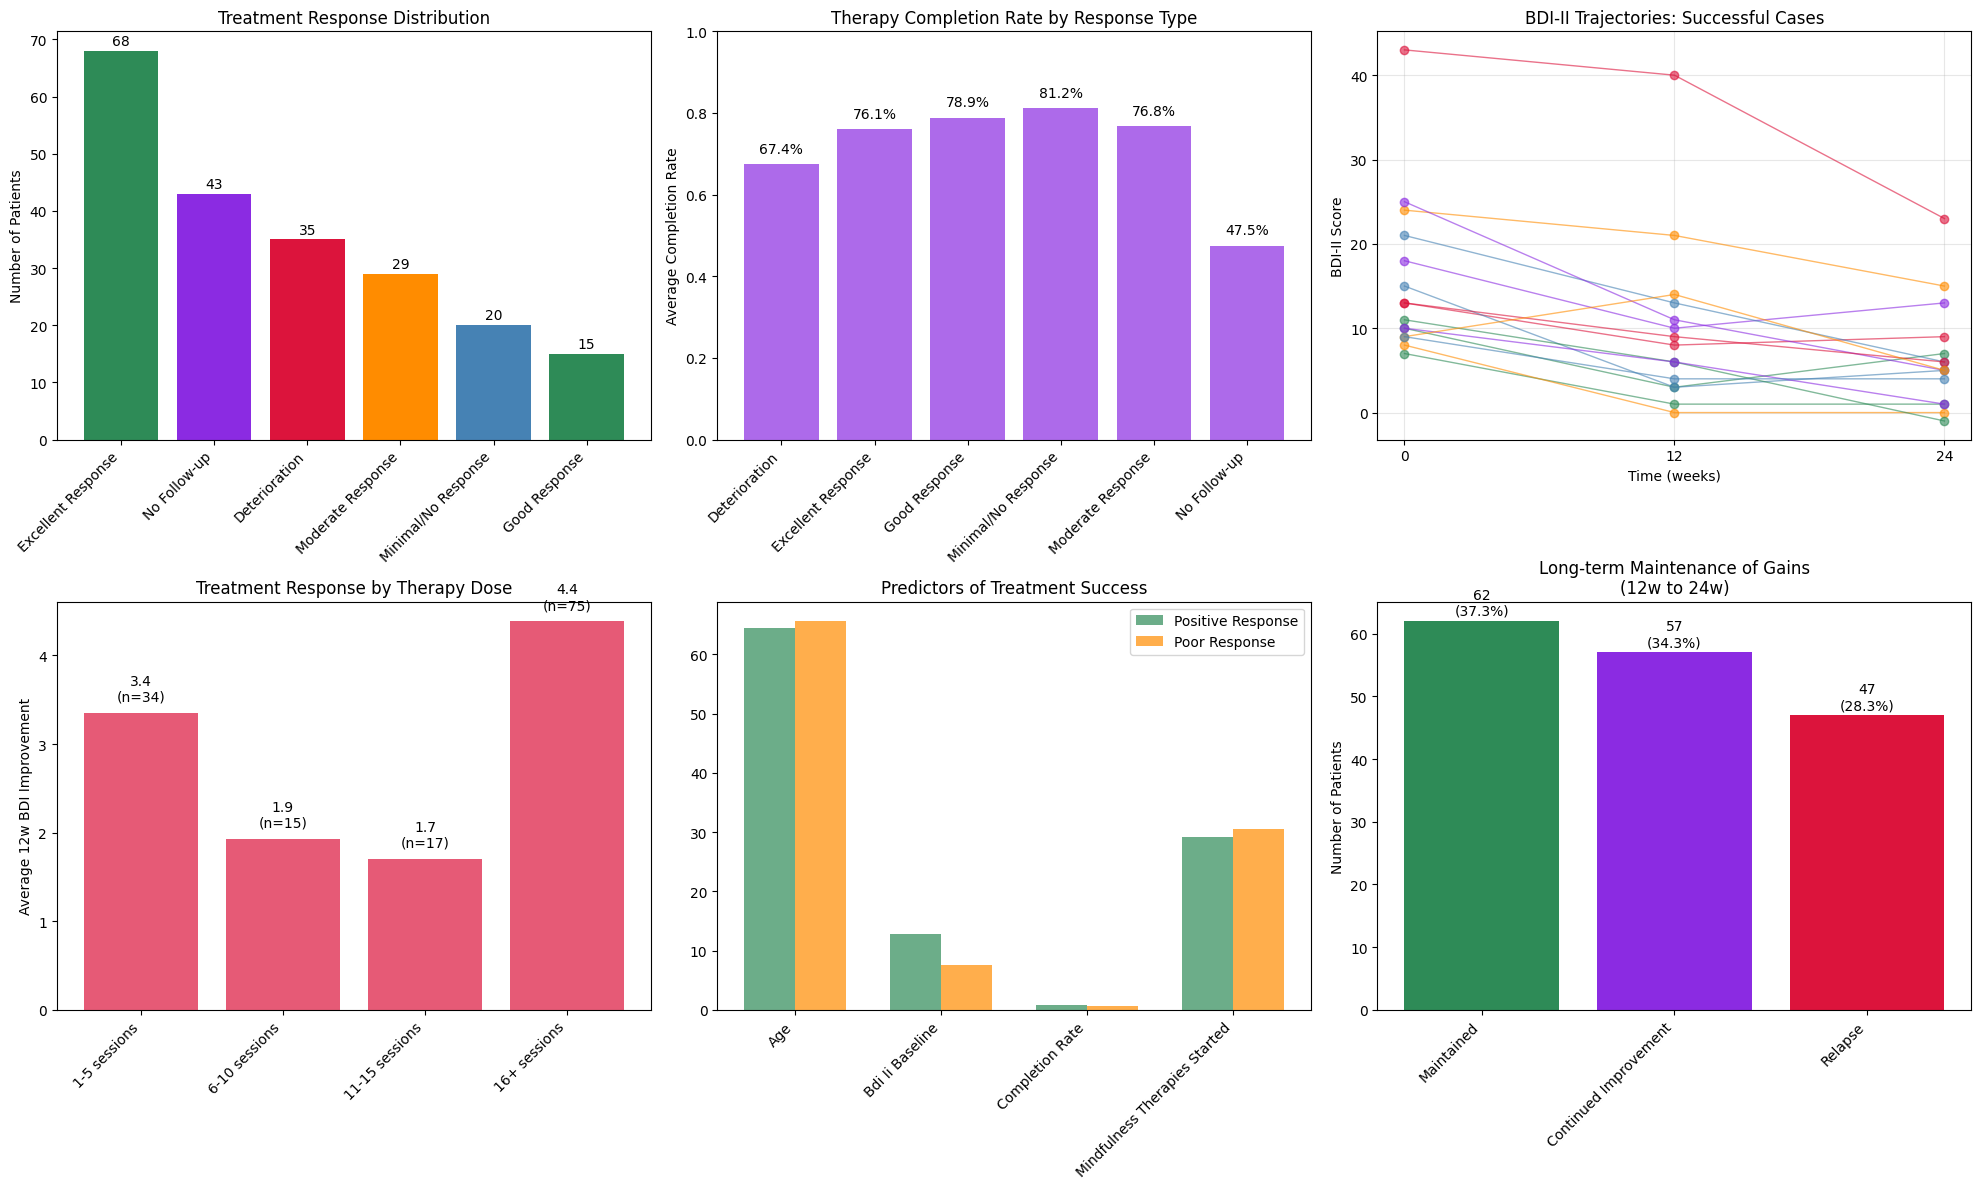


COMPREHENSIVE TREATMENT EFFECTIVENESS ANALYSIS

OVERALL TREATMENT OUTCOMES:
Total patients analyzed: 210
Patients with sufficient follow-up data: 167

TREATMENT SUCCESS RATES:
Overall positive response rate: 67.1% (112/167)
  Excellent Response: 68 patients (32.4%)
  No Follow-up: 43 patients (20.5%)
  Deterioration: 35 patients (16.7%)
  Moderate Response: 29 patients (13.8%)
  Minimal/No Response: 20 patients (9.5%)
  Good Response: 15 patients (7.1%)

KEY INSIGHTS:
1. High therapy completers (≥80%) show 3.4 point average improvement
   vs 2.4 points for low completers (<50%)
2. Patients with severe baseline depression show 75.0% positive response rate
3. 71.7% of patients maintained or continued improving from 12w to 24w


In [13]:
# Detailed individual patient analysis and success pattern identification

# Define treatment success criteria
def classify_treatment_response(row):
    """Classify treatment response based on BDI improvements"""
    imp_12w = row['improvement_12w']
    imp_24w = row['improvement_24w']
    baseline = row['bdi_ii_baseline']
    
    if pd.isna(imp_12w) and pd.isna(imp_24w):
        return 'No Follow-up'
    
    # Use available improvement data
    improvement = imp_24w if not pd.isna(imp_24w) else imp_12w
    
    if pd.isna(improvement) or pd.isna(baseline):
        return 'Insufficient Data'
    
    # Classify based on absolute and percentage improvement
    pct_improvement = (improvement / baseline) * 100 if baseline > 0 else 0
    
    if improvement >= 5 and pct_improvement >= 30:
        return 'Excellent Response'
    elif improvement >= 3 and pct_improvement >= 20:
        return 'Good Response'
    elif improvement >= 1 and pct_improvement >= 10:
        return 'Moderate Response'
    elif improvement >= 0:
        return 'Minimal/No Response'
    else:
        return 'Deterioration'

df_complete['treatment_response'] = df_complete.apply(classify_treatment_response, axis=1)

# Create comprehensive patient response analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Treatment response distribution
ax1 = axes[0, 0]
response_counts = df_complete['treatment_response'].value_counts()
bars = ax1.bar(range(len(response_counts)), response_counts.values, 
               color=therapy_colors[:len(response_counts)])
ax1.set_xticks(range(len(response_counts)))
ax1.set_xticklabels(response_counts.index, rotation=45, ha='right')
ax1.set_title('Treatment Response Distribution')
ax1.set_ylabel('Number of Patients')

# Add count labels
for bar, count in zip(bars, response_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom')

# 2. Completion rate by response type
ax2 = axes[0, 1]
completion_by_response = df_complete.groupby('treatment_response')['completion_rate'].mean()
# Filter out categories with insufficient data
valid_responses = completion_by_response[completion_by_response.notna()]

bars2 = ax2.bar(range(len(valid_responses)), valid_responses.values, 
                color=therapy_colors[1], alpha=0.7)
ax2.set_xticks(range(len(valid_responses)))
ax2.set_xticklabels(valid_responses.index, rotation=45, ha='right')
ax2.set_title('Therapy Completion Rate by Response Type')
ax2.set_ylabel('Average Completion Rate')
ax2.set_ylim(0, 1)

# Add percentage labels
for bar, rate in zip(bars2, valid_responses.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{rate:.1%}', ha='center', va='bottom')

# 3. Patient trajectory visualization (sample of successful cases)
ax3 = axes[0, 2]
successful_patients = df_complete[
    (df_complete['treatment_response'].isin(['Excellent Response', 'Good Response'])) &
    (df_complete['bdi_ii_after_intervention_12w'].notna()) &
    (df_complete['bdi_ii_follow_up_24w'].notna())
].head(15)  # Show first 15 successful cases

for idx, (_, patient) in enumerate(successful_patients.iterrows()):
    time_points = [0, 12, 24]
    bdi_scores = [patient['bdi_ii_baseline'], 
                  patient['bdi_ii_after_intervention_12w'], 
                  patient['bdi_ii_follow_up_24w']]
    
    ax3.plot(time_points, bdi_scores, 'o-', alpha=0.6, linewidth=1, 
             color=therapy_colors[idx % len(therapy_colors)])

ax3.set_xlabel('Time (weeks)')
ax3.set_ylabel('BDI-II Score')
ax3.set_title('BDI-II Trajectories: Successful Cases')
ax3.set_xticks([0, 12, 24])
ax3.grid(True, alpha=0.3)

# 4. Therapy dose-response relationship
ax4 = axes[1, 0]
# Create therapy dose categories
df_complete['therapy_dose'] = pd.cut(df_complete['mindfulness_therapies_completed'], 
                                   bins=[0, 5, 10, 15, float('inf')], 
                                   labels=['1-5 sessions', '6-10 sessions', '11-15 sessions', '16+ sessions'])

dose_response = df_complete.groupby('therapy_dose')['improvement_12w'].agg(['mean', 'count']).reset_index()
dose_response = dose_response[dose_response['count'] >= 5]  # Filter small groups

bars4 = ax4.bar(range(len(dose_response)), dose_response['mean'], 
                color=therapy_colors[2], alpha=0.7)
ax4.set_xticks(range(len(dose_response)))
ax4.set_xticklabels(dose_response['therapy_dose'], rotation=45, ha='right')
ax4.set_title('Treatment Response by Therapy Dose')
ax4.set_ylabel('Average 12w BDI Improvement')

# Add count and mean labels
for i, (bar, mean_val, count) in enumerate(zip(bars4, dose_response['mean'], dose_response['count'])):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{mean_val:.1f}\n(n={count})', ha='center', va='bottom')

# 5. Success predictors analysis
ax5 = axes[1, 1]
# Analyze factors associated with treatment success
success_data = df_complete[df_complete['treatment_response'].isin(['Excellent Response', 'Good Response', 'Moderate Response'])]
no_success_data = df_complete[df_complete['treatment_response'].isin(['Minimal/No Response', 'Deterioration'])]

factors = ['age', 'bdi_ii_baseline', 'completion_rate', 'mindfulness_therapies_started']
factor_comparison = []

for factor in factors:
    if factor in df_complete.columns:
        success_mean = success_data[factor].mean()
        no_success_mean = no_success_data[factor].mean()
        factor_comparison.append((factor, success_mean, no_success_mean))

if factor_comparison:
    factor_names, success_means, no_success_means = zip(*factor_comparison)
    
    x = np.arange(len(factor_names))
    width = 0.35
    
    bars_success = ax5.bar(x - width/2, success_means, width, label='Positive Response', 
                          color=therapy_colors[0], alpha=0.7)
    bars_no_success = ax5.bar(x + width/2, no_success_means, width, label='Poor Response', 
                             color=therapy_colors[3], alpha=0.7)
    
    ax5.set_xticks(x)
    ax5.set_xticklabels([f.replace('_', ' ').title() for f in factor_names], rotation=45, ha='right')
    ax5.set_title('Predictors of Treatment Success')
    ax5.legend()

# 6. Long-term maintenance analysis
ax6 = axes[1, 2]
# Analyze patients with both 12w and 24w data
maintenance_data = df_complete[
    (df_complete['improvement_12w'].notna()) & 
    (df_complete['improvement_24w'].notna())
].copy()

if len(maintenance_data) > 0:
    maintenance_data['improvement_change'] = maintenance_data['improvement_24w'] - maintenance_data['improvement_12w']
    maintenance_data['maintenance_category'] = pd.cut(
        maintenance_data['improvement_change'],
        bins=[-float('inf'), -2, 2, float('inf')],
        labels=['Relapse', 'Maintained', 'Continued Improvement']
    )
    
    maintenance_counts = maintenance_data['maintenance_category'].value_counts()
    
    bars6 = ax6.bar(range(len(maintenance_counts)), maintenance_counts.values,
                    color=therapy_colors[:len(maintenance_counts)])
    ax6.set_xticks(range(len(maintenance_counts)))
    ax6.set_xticklabels(maintenance_counts.index, rotation=45, ha='right')
    ax6.set_title('Long-term Maintenance of Gains\n(12w to 24w)')
    ax6.set_ylabel('Number of Patients')
    
    # Add percentage labels
    total = maintenance_counts.sum()
    for bar, count in zip(bars6, maintenance_counts.values):
        pct = (count / total) * 100
        ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{count}\n({pct:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print comprehensive summary
print("\n" + "="*80)
print("COMPREHENSIVE TREATMENT EFFECTIVENESS ANALYSIS")
print("="*80)

print(f"\nOVERALL TREATMENT OUTCOMES:")
print(f"Total patients analyzed: {len(df_complete)}")

response_summary = df_complete['treatment_response'].value_counts()
total_with_data = response_summary.sum() - response_summary.get('No Follow-up', 0) - response_summary.get('Insufficient Data', 0)
print(f"Patients with sufficient follow-up data: {total_with_data}")

success_categories = ['Excellent Response', 'Good Response', 'Moderate Response']
success_count = response_summary[response_summary.index.isin(success_categories)].sum()
success_rate = (success_count / total_with_data) * 100 if total_with_data > 0 else 0

print(f"\nTREATMENT SUCCESS RATES:")
print(f"Overall positive response rate: {success_rate:.1f}% ({success_count}/{total_with_data})")

for category in response_summary.index:
    count = response_summary[category]
    pct = (count / len(df_complete)) * 100
    print(f"  {category}: {count} patients ({pct:.1f}%)")

print(f"\nKEY INSIGHTS:")
# Calculate key metrics
high_completers = df_complete[df_complete['completion_rate'] >= 0.8]
low_completers = df_complete[df_complete['completion_rate'] < 0.5]

if len(high_completers) > 0 and len(low_completers) > 0:
    high_improvement = high_completers['improvement_12w'].mean()
    low_improvement = low_completers['improvement_12w'].mean()
    print(f"1. High therapy completers (≥80%) show {high_improvement:.1f} point average improvement")
    print(f"   vs {low_improvement:.1f} points for low completers (<50%)")

severe_patients = df_complete[df_complete['baseline_severity'] == 'Severe (29+)']
if len(severe_patients) > 0:
    severe_success_rate = len(severe_patients[severe_patients['treatment_response'].isin(success_categories)]) / len(severe_patients) * 100
    print(f"2. Patients with severe baseline depression show {severe_success_rate:.1f}% positive response rate")

if len(maintenance_data) > 0:
    maintained_or_improved = len(maintenance_data[maintenance_data['maintenance_category'].isin(['Maintained', 'Continued Improvement'])])
    maintenance_rate = (maintained_or_improved / len(maintenance_data)) * 100
    print(f"3. {maintenance_rate:.1f}% of patients maintained or continued improving from 12w to 24w")

### 4. BDI Baseline Severity vs Therapy Completion Impact Analysis

This analysis examines how therapy completion percentage affects BDI improvement across different baseline severity levels.

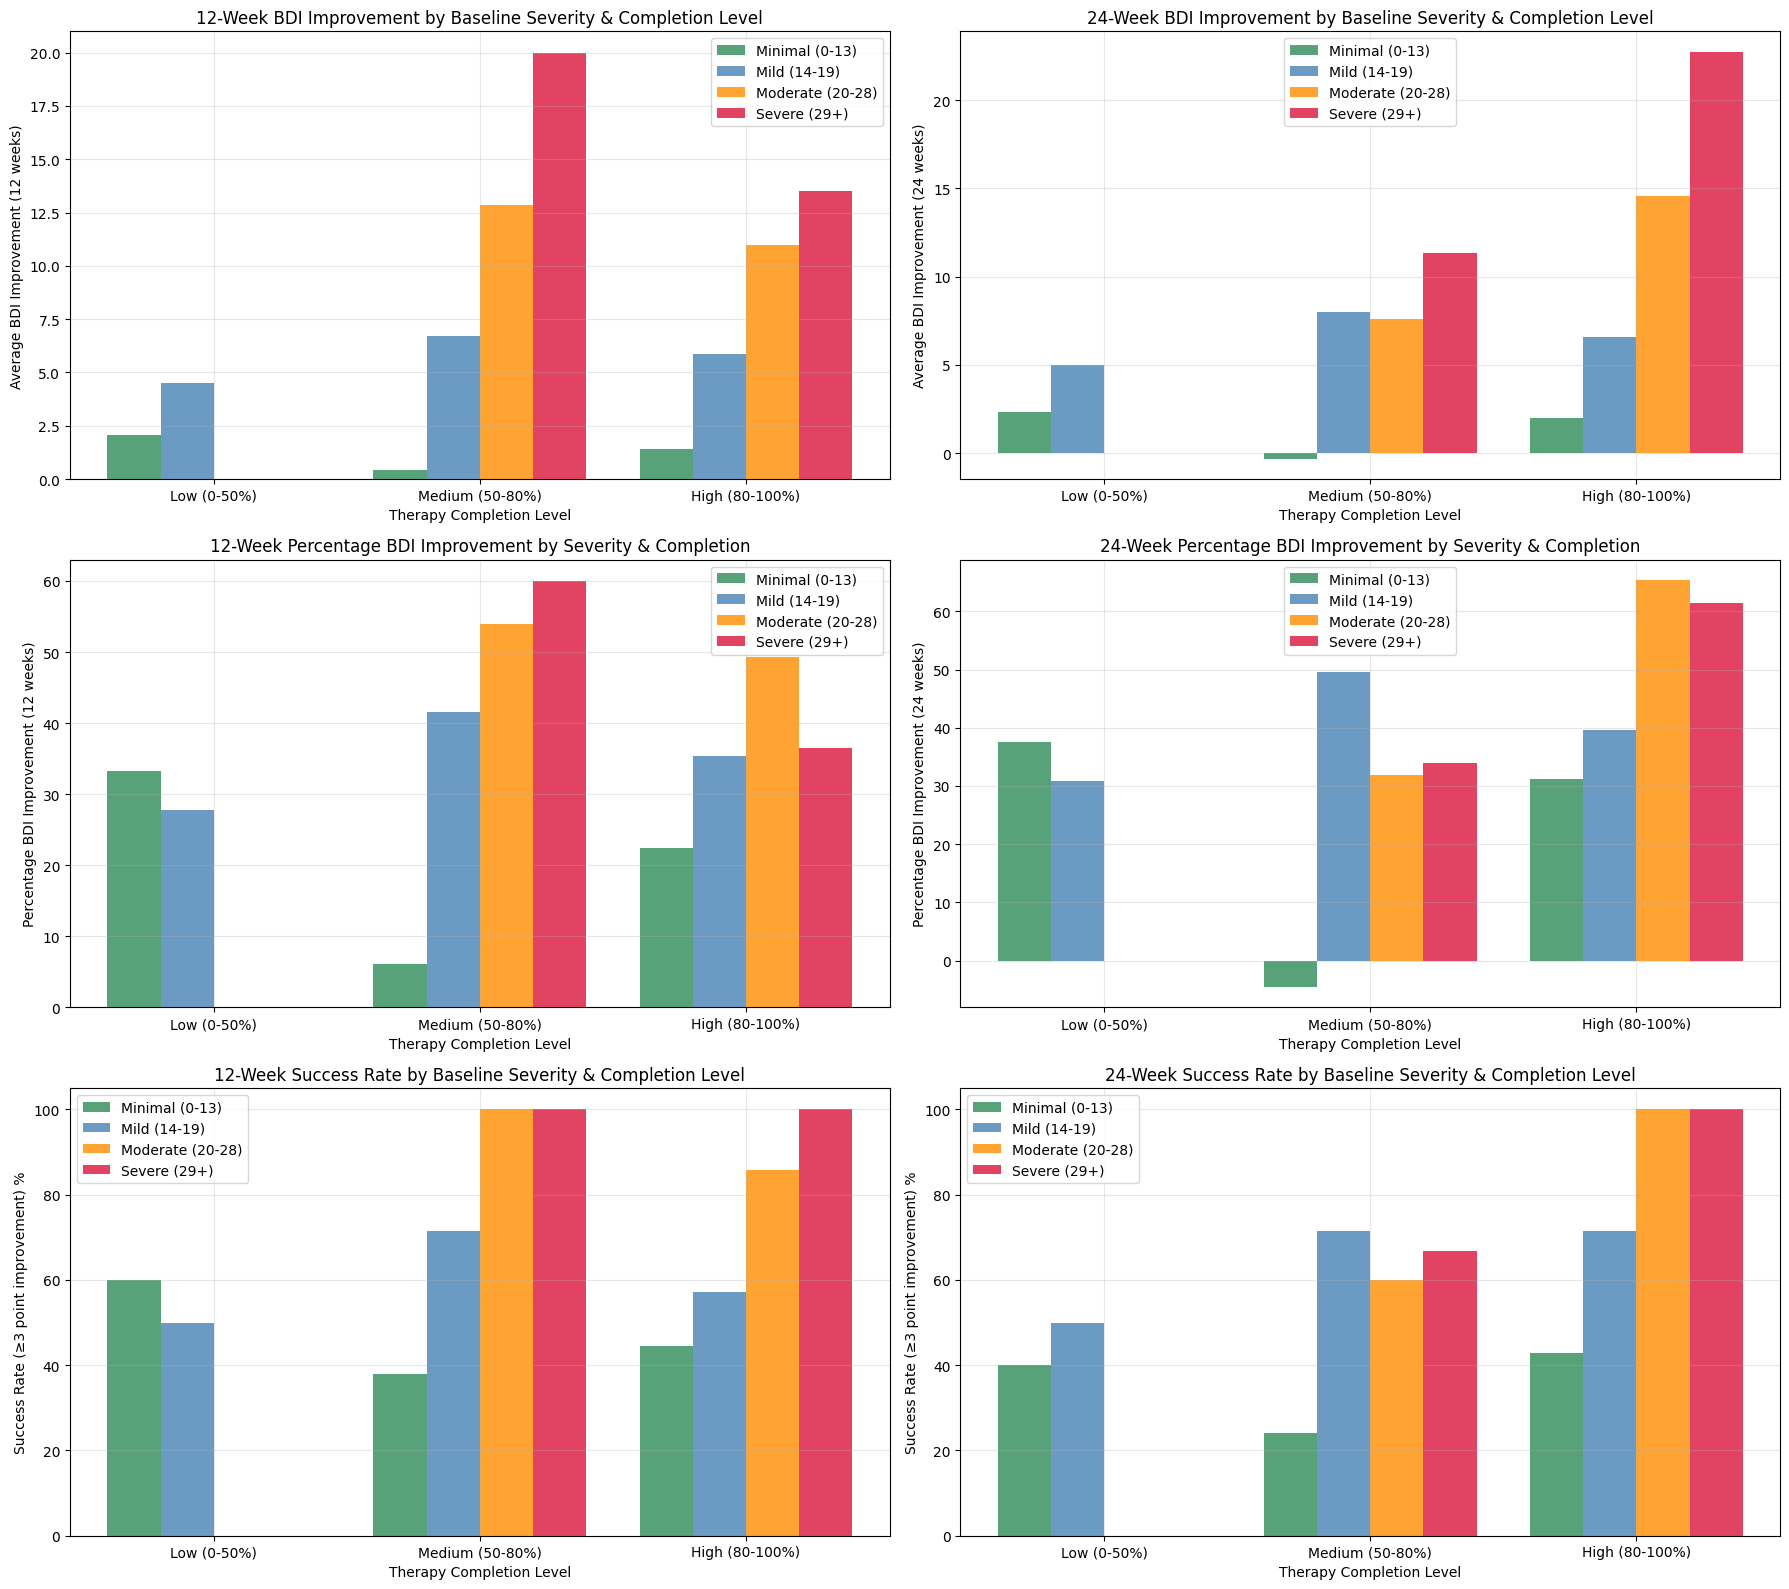

DETAILED NUMERICAL ANALYSIS: BDI BASELINE SEVERITY vs THERAPY COMPLETION IMPACT

Complete Analysis Table:
----------------------------------------------------------------------------------------------------


,Baseline_Severity,Completion_Level,Patient_Count,Avg_Baseline_BDI,Avg_12w_BDI,Avg_24w_BDI,Avg_Improvement_12w,Avg_Improvement_24w,Pct_Improvement_12w,Pct_Improvement_24w,Success_Rate_12w,Success_Rate_24w
0,Minimal (0-13),Low (0-50%),18,6.2,4.8,4.5,2.1,2.3,33.2,37.5,60.0,40.0
1,Minimal (0-13),Medium (50-80%),34,6.8,6.9,7.6,0.4,-0.3,6.1,-4.5,37.9,24.1
2,Minimal (0-13),High (80-100%),66,6.3,5.0,4.5,1.4,2.0,22.4,31.2,44.4,42.9
3,Mild (14-19),Low (0-50%),5,16.2,10.5,10.0,4.5,5.0,27.8,30.9,50.0,50.0
4,Mild (14-19),Medium (50-80%),7,16.1,9.4,8.1,6.7,8.0,41.6,49.6,71.4,71.4
5,Mild (14-19),High (80-100%),14,16.6,10.7,10.0,5.9,6.6,35.3,39.7,57.1,71.4
6,Moderate (20-28),Low (0-50%),1,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,Moderate (20-28),Medium (50-80%),10,23.8,12.2,18.0,12.8,7.6,53.9,31.9,100.0,60.0
8,Moderate (20-28),High (80-100%),7,22.3,11.3,7.7,11.0,14.6,49.4,65.4,85.7,100.0
9,Severe (29+),Medium (50-80%),3,33.3,13.3,22.0,20.0,11.3,60.0,34.0,100.0,66.7



KEY INSIGHTS FROM THE ANALYSIS
1. BEST OUTCOMES:
   12-week: Severe (29+) + Medium (50-80%) → 20.0 point improvement
   24-week: Severe (29+) + High (80-100%) → 22.8 point improvement

2. COMPLETION RATE IMPACT BY SEVERITY:
   Minimal (0-13): High vs Low completion → +-0.7 points (12w), +-0.4 points (24w)
   Mild (14-19): High vs Low completion → +1.4 points (12w), +1.6 points (24w)
   Moderate (20-28): High vs Low completion → +nan points (12w), +nan points (24w)

3. SUCCESS RATE PATTERNS:
   Combinations with ≥70% success rate (12w): 5
   Combinations with ≥70% success rate (24w): 4


In [14]:
# Comprehensive analysis of baseline severity vs completion rate impact on outcomes

# Create completion rate categories for better analysis
def categorize_completion_rate(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate < 0.5:
        return 'Low (0-50%)'
    elif rate < 0.8:
        return 'Medium (50-80%)'
    else:
        return 'High (80-100%)'

df_complete['completion_category'] = df_complete['completion_rate'].apply(categorize_completion_rate)

# Create comprehensive analysis table
severity_completion_analysis = []

for severity in ['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']:
    for completion in ['Low (0-50%)', 'Medium (50-80%)', 'High (80-100%)']:
        subset = df_complete[
            (df_complete['baseline_severity'] == severity) & 
            (df_complete['completion_category'] == completion)
        ]
        
        if len(subset) > 0:
            analysis_row = {
                'Baseline_Severity': severity,
                'Completion_Level': completion,
                'Patient_Count': len(subset),
                'Avg_Baseline_BDI': subset['bdi_ii_baseline'].mean(),
                'Avg_12w_BDI': subset['bdi_ii_after_intervention_12w'].mean(),
                'Avg_24w_BDI': subset['bdi_ii_follow_up_24w'].mean(),
                'Avg_Improvement_12w': subset['improvement_12w'].mean(),
                'Avg_Improvement_24w': subset['improvement_24w'].mean(),
                'Pct_Improvement_12w': (subset['improvement_12w'].mean() / subset['bdi_ii_baseline'].mean() * 100) if subset['bdi_ii_baseline'].mean() > 0 else 0,
                'Pct_Improvement_24w': (subset['improvement_24w'].mean() / subset['bdi_ii_baseline'].mean() * 100) if subset['bdi_ii_baseline'].mean() > 0 else 0,
                'Success_Rate_12w': len(subset[subset['improvement_12w'] >= 3]) / len(subset[subset['improvement_12w'].notna()]) * 100 if len(subset[subset['improvement_12w'].notna()]) > 0 else 0,
                'Success_Rate_24w': len(subset[subset['improvement_24w'] >= 3]) / len(subset[subset['improvement_24w'].notna()]) * 100 if len(subset[subset['improvement_24w'].notna()]) > 0 else 0
            }
            severity_completion_analysis.append(analysis_row)

analysis_df = pd.DataFrame(severity_completion_analysis)

# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# Define colors for severity levels
severity_colors = {
    'Minimal (0-13)': '#2E8B57',    # Sea Green
    'Mild (14-19)': '#4682B4',      # Steel Blue  
    'Moderate (20-28)': '#FF8C00',  # Dark Orange
    'Severe (29+)': '#DC143C'       # Crimson
}

# Plot 1: Average 12w Improvement by Severity and Completion
ax1 = axes[0, 0]
completion_levels = ['Low (0-50%)', 'Medium (50-80%)', 'High (80-100%)']
width = 0.2
x = np.arange(len(completion_levels))

for i, severity in enumerate(['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']):
    severity_data = analysis_df[analysis_df['Baseline_Severity'] == severity]
    if len(severity_data) > 0:
        improvements = []
        for comp_level in completion_levels:
            comp_data = severity_data[severity_data['Completion_Level'] == comp_level]
            if len(comp_data) > 0:
                improvements.append(comp_data['Avg_Improvement_12w'].iloc[0])
            else:
                improvements.append(0)
        
        ax1.bar(x + i*width, improvements, width, label=severity, 
                color=severity_colors[severity], alpha=0.8)

ax1.set_xlabel('Therapy Completion Level')
ax1.set_ylabel('Average BDI Improvement (12 weeks)')
ax1.set_title('12-Week BDI Improvement by Baseline Severity & Completion Level')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(completion_levels)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Average 24w Improvement by Severity and Completion  
ax2 = axes[0, 1]
for i, severity in enumerate(['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']):
    severity_data = analysis_df[analysis_df['Baseline_Severity'] == severity]
    if len(severity_data) > 0:
        improvements = []
        for comp_level in completion_levels:
            comp_data = severity_data[severity_data['Completion_Level'] == comp_level]
            if len(comp_data) > 0:
                improvements.append(comp_data['Avg_Improvement_24w'].iloc[0])
            else:
                improvements.append(0)
        
        ax2.bar(x + i*width, improvements, width, label=severity, 
                color=severity_colors[severity], alpha=0.8)

ax2.set_xlabel('Therapy Completion Level')
ax2.set_ylabel('Average BDI Improvement (24 weeks)')
ax2.set_title('24-Week BDI Improvement by Baseline Severity & Completion Level')
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels(completion_levels)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Percentage Improvement 12w
ax3 = axes[1, 0]
for i, severity in enumerate(['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']):
    severity_data = analysis_df[analysis_df['Baseline_Severity'] == severity]
    if len(severity_data) > 0:
        pct_improvements = []
        for comp_level in completion_levels:
            comp_data = severity_data[severity_data['Completion_Level'] == comp_level]
            if len(comp_data) > 0:
                pct_improvements.append(comp_data['Pct_Improvement_12w'].iloc[0])
            else:
                pct_improvements.append(0)
        
        ax3.bar(x + i*width, pct_improvements, width, label=severity, 
                color=severity_colors[severity], alpha=0.8)

ax3.set_xlabel('Therapy Completion Level')
ax3.set_ylabel('Percentage BDI Improvement (12 weeks)')
ax3.set_title('12-Week Percentage BDI Improvement by Severity & Completion')
ax3.set_xticks(x + width * 1.5)
ax3.set_xticklabels(completion_levels)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Percentage Improvement 24w
ax4 = axes[1, 1]
for i, severity in enumerate(['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']):
    severity_data = analysis_df[analysis_df['Baseline_Severity'] == severity]
    if len(severity_data) > 0:
        pct_improvements = []
        for comp_level in completion_levels:
            comp_data = severity_data[severity_data['Completion_Level'] == comp_level]
            if len(comp_data) > 0:
                pct_improvements.append(comp_data['Pct_Improvement_24w'].iloc[0])
            else:
                pct_improvements.append(0)
        
        ax4.bar(x + i*width, pct_improvements, width, label=severity, 
                color=severity_colors[severity], alpha=0.8)

ax4.set_xlabel('Therapy Completion Level')
ax4.set_ylabel('Percentage BDI Improvement (24 weeks)')
ax4.set_title('24-Week Percentage BDI Improvement by Severity & Completion')
ax4.set_xticks(x + width * 1.5)
ax4.set_xticklabels(completion_levels)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Success Rate 12w (≥3 point improvement)
ax5 = axes[2, 0]
for i, severity in enumerate(['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']):
    severity_data = analysis_df[analysis_df['Baseline_Severity'] == severity]
    if len(severity_data) > 0:
        success_rates = []
        for comp_level in completion_levels:
            comp_data = severity_data[severity_data['Completion_Level'] == comp_level]
            if len(comp_data) > 0:
                success_rates.append(comp_data['Success_Rate_12w'].iloc[0])
            else:
                success_rates.append(0)
        
        ax5.bar(x + i*width, success_rates, width, label=severity, 
                color=severity_colors[severity], alpha=0.8)

ax5.set_xlabel('Therapy Completion Level')
ax5.set_ylabel('Success Rate (≥3 point improvement) %')
ax5.set_title('12-Week Success Rate by Baseline Severity & Completion Level')
ax5.set_xticks(x + width * 1.5)
ax5.set_xticklabels(completion_levels)
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Success Rate 24w
ax6 = axes[2, 1]
for i, severity in enumerate(['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']):
    severity_data = analysis_df[analysis_df['Baseline_Severity'] == severity]
    if len(severity_data) > 0:
        success_rates = []
        for comp_level in completion_levels:
            comp_data = severity_data[severity_data['Completion_Level'] == comp_level]
            if len(comp_data) > 0:
                success_rates.append(comp_data['Success_Rate_24w'].iloc[0])
            else:
                success_rates.append(0)
        
        ax6.bar(x + i*width, success_rates, width, label=severity, 
                color=severity_colors[severity], alpha=0.8)

ax6.set_xlabel('Therapy Completion Level')
ax6.set_ylabel('Success Rate (≥3 point improvement) %')
ax6.set_title('24-Week Success Rate by Baseline Severity & Completion Level')
ax6.set_xticks(x + width * 1.5)
ax6.set_xticklabels(completion_levels)
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*100)
print("DETAILED NUMERICAL ANALYSIS: BDI BASELINE SEVERITY vs THERAPY COMPLETION IMPACT")
print("="*100)
print("\nComplete Analysis Table:")
print("-"*100)

# Format and display the analysis table
formatted_df = analysis_df.copy()
for col in ['Avg_Baseline_BDI', 'Avg_12w_BDI', 'Avg_24w_BDI', 'Avg_Improvement_12w', 'Avg_Improvement_24w']:
    formatted_df[col] = formatted_df[col].round(1)
for col in ['Pct_Improvement_12w', 'Pct_Improvement_24w', 'Success_Rate_12w', 'Success_Rate_24w']:
    formatted_df[col] = formatted_df[col].round(1)

display(formatted_df)

print("\n" + "="*100)
print("KEY INSIGHTS FROM THE ANALYSIS")
print("="*100)

# Generate insights
insights = []

# Find best performing combinations
best_12w = analysis_df.loc[analysis_df['Avg_Improvement_12w'].idxmax()]
best_24w = analysis_df.loc[analysis_df['Avg_Improvement_24w'].idxmax()]

insights.append(f"1. BEST OUTCOMES:")
insights.append(f"   12-week: {best_12w['Baseline_Severity']} + {best_12w['Completion_Level']} → {best_12w['Avg_Improvement_12w']:.1f} point improvement")
insights.append(f"   24-week: {best_24w['Baseline_Severity']} + {best_24w['Completion_Level']} → {best_24w['Avg_Improvement_24w']:.1f} point improvement")

# Analyze completion effect within each severity
insights.append(f"\n2. COMPLETION RATE IMPACT BY SEVERITY:")
for severity in ['Minimal (0-13)', 'Mild (14-19)', 'Moderate (20-28)', 'Severe (29+)']:
    sev_data = analysis_df[analysis_df['Baseline_Severity'] == severity]
    if len(sev_data) >= 2:
        high_comp = sev_data[sev_data['Completion_Level'] == 'High (80-100%)']
        low_comp = sev_data[sev_data['Completion_Level'] == 'Low (0-50%)']
        
        if len(high_comp) > 0 and len(low_comp) > 0:
            diff_12w = high_comp['Avg_Improvement_12w'].iloc[0] - low_comp['Avg_Improvement_12w'].iloc[0]
            diff_24w = high_comp['Avg_Improvement_24w'].iloc[0] - low_comp['Avg_Improvement_24w'].iloc[0]
            insights.append(f"   {severity}: High vs Low completion → +{diff_12w:.1f} points (12w), +{diff_24w:.1f} points (24w)")

# Success rate patterns
insights.append(f"\n3. SUCCESS RATE PATTERNS:")
high_success_12w = analysis_df[analysis_df['Success_Rate_12w'] >= 70]
high_success_24w = analysis_df[analysis_df['Success_Rate_24w'] >= 70]

insights.append(f"   Combinations with ≥70% success rate (12w): {len(high_success_12w)}")
insights.append(f"   Combinations with ≥70% success rate (24w): {len(high_success_24w)}")

for insight in insights:
    print(insight)